# compute D given MSD
Tim Tyree<br>
1.17.2021

In [ ]:
# num_individuals_lst
#TODO: plot emsd_mean and draw lines for it

In [451]:
#plot ^this for the first NN files
NN=len(input_fn_lst)
T_min=1000
min_num_individuals=50
trials_considered=0
fontsize=22;saving=True

savefig_folder=os.path.join(nb_dir,'Figures/msd_loglog')
num_individuals_lst=[]
emsd_net=0.
for fn in input_fn_lst[:NN]:
    #compute emsd
    df=pd.read_csv(fn)
    # mem=0;sr=width*2;DS=dsdpixel
    # df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
    DT=1.#compute_time_between_frames(df);#print(f"DT={DT}")
    df=get_all_longer_than(df,DT,T_min=T_min)
    #count remaining individuals
    num_individuals=len(list(set(df.particle.values)))
    emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=150, printing=False,DS=0.025)
    use_trial=(num_individuals>min_num_individuals) & (emsd is not None)
    if use_trial:
        #measure the slope of the log-log plot
        x_values=emsd.index.values/10**3#np.log10(emsd.index.values)
        y_values=emsd.values*10**3#np.log10(emsd.values)
        plt.plot(x_values,y_values, label='_Hidden', color='gray', alpha=0.3)
        trials_considered+=1
        num_individuals_lst.append(num_individuals)
        emsd_net+=emsd
emsd_mean=emsd_net/trials_considered
#format plot
plt.xscale('log')
plt.yscale('log')
# plt.plot(lag_values,2+0.*slope_values,label='ballistic')
# plt.plot(lag_values,1+0.*slope_values,label='diffusive')
plt.xlabel('lag (seconds)',fontsize=fontsize)
plt.ylabel('MSD (cm$^2$)',fontsize=fontsize)
# plt.legend(loc='upper right',fontsize=fontsize)
plt.title(f'FK model, Area:25cm$^2$, $D_{{V_{{mem}}}}$:0.5cm$^2$/s, N:{trials_considered}\nmin_duration:{T_min/10**3:.1f}s\n',fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.ylim([0,2.05])
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    savefig_fn=f'logMSD_vs_loglag_Tmin_{T_min/10**3:.1f}_N_{trials_considered}_mni_{min_num_individuals}.png'
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
    plt.close()
beep(3)

saved figure in 
	logMSD_vs_loglag_Tmin_1.0_N_63_mni_50.png


0

In [436]:
print(DT)

1.0


# log-log plot of EMSD for many trials

In [378]:
trackpy.imsd(d)

TypeError: imsd() missing 2 required positional arguments: 'mpp' and 'fps'

In [314]:
d=traj[traj.particle==16].copy()

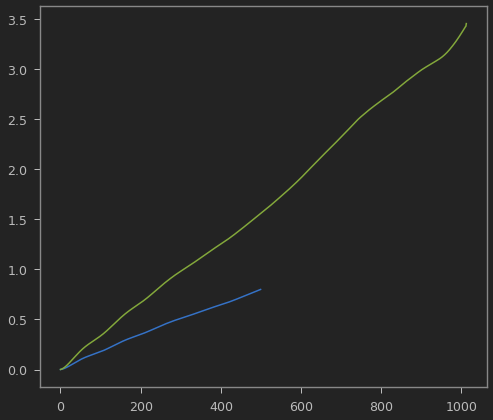

In [377]:
emsd_values=np.mean(np.array(ims_lst),axis=0)[0]/3000#Nimsd
# plt.plot(msd_fft(d[['frame','x','y']].values))
# plt.plot(msd_fft(d[['x','y']].values))
# plt.plot(msd_straight_forward(d[['x','y']].values))
# plt.plot(im)
plt.plot(emsd_values)
plt.plot(emsd.values)

Object `pd.add` not found.


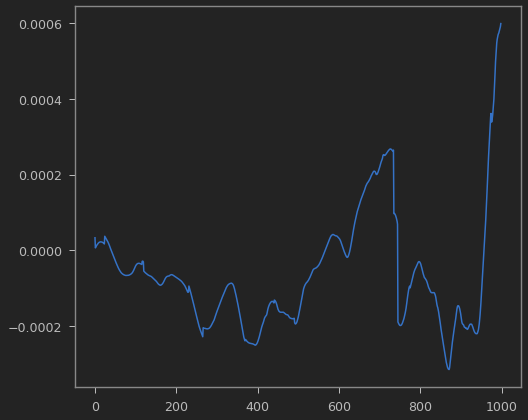

confirmed: for times less than 600ms, the emsd effective weighting agreed with uniform weighting to 3 sig. figs.


In [408]:
# pd.concat(ims_lst)
# ims_lst[0]
mimsd=np.mean(np.hstack(ims_lst),axis=1)
plt.plot(np.diff(mimsd*0.025**2)[:999]-np.diff(emsd.values)[:999])
plt.show()
print(f"confirmed: for times less than 600ms, the emsd effective weighting agreed with uniform weighting to 3 sig. figs.")

In [392]:
im=emsd.copy()
im*=0.
Nimsd=pid_values.shape[0]
ims_lst=[]
for pid in pid_values:
    d=traj[traj.particle==pid].copy()
    ims=trackpy.imsd(d,mpp=1.,fps=1.,max_lagtime=1000)
    ims_lst.append(ims.rename(columns={pid:'msd'}).values[:1000])#.values[:500].T)

#     ims_lst.append(ims.rename(columns={pid:'msd'}))#.values[:500].T)
    #     im += ims.values/Nimsd
#     plt.plot(im)
# plt.plot(emsd.values)
# plt.show()

In [340]:
pid_values=traj.groupby('particle').x.mean().index.values
pid_values

array([ 16,  31,  32,  46,  49,  51,  54,  59,  78, 102, 150, 171, 177,
       178, 179, 181, 232, 239, 260, 268, 272, 281, 283, 299, 305, 359,
       384])

In [310]:
emsd=compute_emsd(traj,DT=DT)

In [309]:
# trackpy.motion.msd


<function trackpy.motion.msd(traj, mpp, fps, max_lagtime=100, detail=False, pos_columns=None)>

<x>        <y>       <x^2>        <y^2>          msd  \
particle frame                                                              
16       1     -0.010060   0.064356    0.165765     2.111154     2.276918   
         2     -0.020987   0.131274    0.501119     4.553168     5.054288   
         3     -0.032217   0.199009    0.992258     7.313042     8.305300   
         4     -0.043688   0.267197    1.628849    10.382117    12.010965   
         5     -0.055340   0.335535    2.401268    13.752079    16.153347   
...                  ...        ...         ...          ...          ...   
384      96    -7.859883 -18.026374  444.620256  1330.371152  1774.991408   
         97    -7.947702 -18.234917  449.558343  1346.315087  1795.873431   
         98    -8.035138 -18.443756  454.524758  1362.431246  1816.956003   
         99    -8.122170 -18.652870  459.522354  1378.728748  1838.251101   
         100   -8.208773 -18.862245  464.552249  1395.198132  1859.750382   

                          N   lagt  
particle frame                      
16       1      1012.000000    1.0  
         2       674.222296    2.0  
         3       478.720409    3.0  
         4       367.239968    4.0  
         5       296.817013    5.0  
...                     ...    ...  
384      96       18.694262   96.0  
         97       18.490133   97.0  
         98       18.290170   98.0  
         99       18.094249   99.0  
         100      17.902248  100.0  

[2700 rows x 7 columns]

In [307]:
traj=df
mpp=1.;fps=1.;max_lagtime=100;pos_columns=['x','y']
ids = []
msds = []
for pid, ptraj in traj.reset_index(drop=True).groupby('particle'):
    msds.append(trackpy.motion.msd(ptraj, mpp, fps, max_lagtime, True, pos_columns))
    ids.append(pid)
msds = trackpy.motion.pandas_concat(msds, keys=ids, names=['particle', 'frame'])
results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized
# Above, lagt is lumped in with the rest for simplicity and speed.
# Here, rebuild it from the frame index.
# if not detail:
#     return results.set_index('lagt')['msd']
# correctly compute the effective number of independent measurements
results['N'] = msds['N'].sum(level=1)
#     return results


In [299]:
trackpy.motion.pandas_concat

In [297]:
results

,<x>,<y>,<x^2>,<y^2>,msd,N,lagt
frame,,,,,,,
1,-0.015669,0.010586,0.635312,0.484295,1.119607,38637.001120,1.0
2,-0.031141,0.021428,1.482745,1.205393,2.688138,25746.002767,2.0
3,-0.045034,0.030387,2.602408,2.307863,4.910271,18284.240601,3.0
4,-0.058770,0.039478,3.908105,3.617524,7.525628,14029.296704,4.0
5,-0.072360,0.048651,5.390089,5.124266,10.514355,11341.411036,5.0
...,...,...,...,...,...,...,...
96,-1.646149,0.803172,222.088664,291.813660,513.902324,573.922926,96.0
97,-1.663994,0.811287,223.859567,294.612151,518.471718,567.698201,97.0
98,-1.681700,0.819340,225.651902,297.437235,523.089137,561.600544,98.0


In [296]:
results=trackpy.emsd(df, mpp=1., fps=1., max_lagtime=100, detail=True, pos_columns=None)

In [311]:
def autocorrFFT(x):
    N=len(x)
    F = np.fft.fft(x, n=2*N)  #2*N because of zero-padding
    PSD = F * F.conjugate()
    res = np.fft.ifft(PSD)
    res= (res[:N]).real   #now we have the autocorrelation in convention B
    n=N*np.ones(N)-np.arange(0,N) #divide res(m) by (N-m)
    return res/n #this is the autocorrelation in convention A

def msd_fft(r):
    '''compute the fast fourier transfor,'''
    N=len(r)
    D=np.square(r).sum(axis=1) 
    D=np.append(D,0) 
    S2=sum([autocorrFFT(r[:, i]) for i in range(r.shape[1])])
    Q=2*D.sum()
    S1=np.zeros(N)
    for m in range(N):
        Q=Q-D[m-1]-D[N-m]
        S1[m]=Q/(N-m)
    return S1-2*S2

#compare to the slower version O(N**2)
def msd_straight_forward(r):
    shifts = np.arange(len(r))
    msds = np.zeros(shifts.size)
    for i, shift in enumerate(shifts):
        diffs = r[:-shift if shift else None] - r[shift:]
        sqdist = np.square(diffs).sum(axis=1)
        msds[i] = sqdist.mean()
    return msds

# Compare trackpy's EMSD with that of uniform weighting
__confirmed:__ for times less than 600ms, the emsd effective weighting agreed with uniform weighting to 3 sig. figs.


__

A model for mean squared displacement that supports ballistic motion at brief timescales $\tau\ll\tau_0$ is postulated to be

$$
\text{MSD}(\tau)=\frac{v_\text{rms}^2\tau^2}{1+(\tau/\tau_0)^\beta}
$$

For some characteristic timescale, $\tau_0$. and for some root-mean-squared velocity, $v_\text{rms}$. The value, $\beta=0$, corresponds to ballistic motion for all time scales.  For large timescales, we approximate to zeroth order

$$
\text{MSD}(\tau)\sim v_\text{rms}^2\tau^2(\tau_0/\tau)^\beta\quad \text{as}\quad \tau/\tau_0\rightarrow\infty
$$

The dimensionless parameter $\beta=1$ corresponds to Brownian motion in two spatial dimensions with diffusion coefficient given by 
$$
D=\frac{1}{4}v_\text{rms}^2\tau_0
$$



__Estimation of Exponent Value__

The exponent value, $\nu=\nu(\tau)$ is computed at lag $\tau$ by sampling a fixed temporal window of duration $\tau_\text{window}$ centered at time $\tau$.   This time window is sampled from the log-log plot of MSD _versus_ $\tau$.  The numerical value of $\nu$ is taken to be the expected slope resulting from a least squares regression trained on the aforementioned sample.  A value of $\nu=2$ results from ballistic motion while a value of $\nu=1$ results from Brownian motion.

__Estimation of Ensemble Averaged Mean Squared Displacment__

Let $\vec{r}_i(k)$ be the $k^\text{th}$ location of the $i^\text{th}$ spiral tip for $k=1,2,...,M_i$.  The mean squared displacement of $\vec{r}_i(k)$ was computed via fast Fourier transform in agreement with

$$
\text{MSD}_i(m)=\frac{1}{M-m}\sum_{k=0}^{M_i-m-1}\Big(\vec{r}_i(k+m)-\vec{r}_i(k)\Big)^2
$$

The ensemble averaged mean squared displacement was computed for spiral tips $i=1,2,...,N$ according to the weighted average.  Weights were proportional to the effective number of statistically independent measurements of the mean square displacement of a single trajectory [1], which was found here to agree with uniform weights to three significant figures for lags briefer than 600 ms.

<br>

[1] Qian, Hong, Michael P. Sheetz, and Elliot L. Elson. "Single particle
    tracking. Analysis of diffusion and flow in two-dimensional systems."
    Biophysical journal 60.4 (1991): 910.

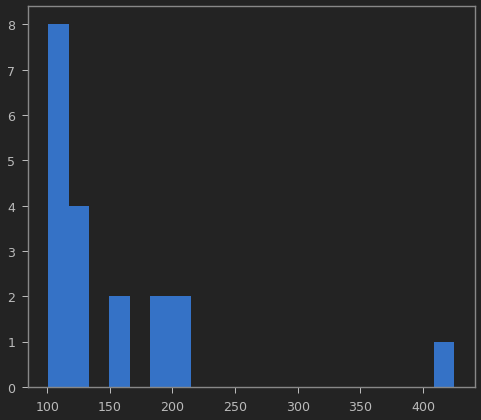

0

In [440]:
plt.hist(num_individuals_lst,bins=20)
plt.show()
beep(3)

In [463]:
#plot ^this for the first NN=10 files
NN=len(input_fn_lst)
T_min=1000
window_width=300#50#ms
trials_considered=0
min_num_individuals=50
fontsize=22;saving=True

savefig_folder=os.path.join(nb_dir,'Figures/msd_exponents')
saving=True
num_individuals_lst=[];intercept_lst_lst=[];slope_lst_lst=[]
for fn in input_fn_lst:#[:NN]:
    #compute emsd
    df=pd.read_csv(fn)
    # mem=0;sr=width*2;DS=dsdpixel
    # df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
    DT=compute_time_between_frames(df);#print(f"DT={DT}")
    df=get_all_longer_than(df,DT,T_min=T_min)
    #count remaining individuals
    num_individuals=len(list(set(df.particle.values)))
    emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=150, printing=False,DS=0.025)
    if emsd is not None:
        tau_min_values=np.arange(0,T_min-300,10)#ms
        #compute the slope over a sliding window
        slope_lst=[]
        intercept_lst=[]
        use_trial=num_individuals>min_num_individuals
        for tau_min in tau_min_values:
            tau_max=tau_min+window_width
            #measure the slope of the log-log plot
            tv=emsd.index.values
            boo=(tv>=tau_min)&(tv<=tau_max)
            x_values=np.log10(tv[boo])
            y_values=np.log10(emsd.values[boo])
            if not boo.any():
                use_trial=False
            else:
                slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
                #     print(f"slope={slope:.4f} +-{std_err:.4f}, intercept={intercept:.4f}, T_min={T_min:.0f}, tau_min={tau_min:.0f}, tau_max={tau_max:.0f}, N={num_individuals}")
                slope_lst.append(slope) 
                intercept_lst.append(intercept)
        if use_trial:
            slope_values=np.array(slope_lst)
            lag_values=(tau_min_values+window_width/2)/10**3   
            plt.plot(lag_values,slope_values, label='_Hidden', color='gray', alpha=0.3)
            trials_considered+=1
            num_individuals_lst.append(num_individuals)
            slope_lst_lst.append(slope_lst)
            intercept_lst_lst.append(intercept_lst)
#format plot
plt.plot(lag_values,2+0.*slope_values,label='ballistic')
plt.plot(lag_values,1+0.*slope_values,label='diffusive')
plt.xlabel('lag (seconds)',fontsize=fontsize)
plt.ylabel('exponent value',fontsize=fontsize)
plt.legend(loc='upper right',fontsize=fontsize)
plt.title(f'FK model, Area:25cm$^2$, $D_{{V_{{mem}}}}$:0.5cm$^2$/s, N:{trials_considered}\nmin_duration:{T_min/10**3:.1f}s, window_width={window_width/10**3:0.2f}s\n',fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.ylim([0,2.05])
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    savefig_fn=f'exponent_vs_lag_Tmin_{T_min/10**3:.1f}_ww_{window_width/10**3:.2f}_N_{trials_considered}_mni_{min_num_individuals}.png'
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
    plt.close()
beep(3)

saved figure in 
	exponent_vs_lag_Tmin_1.0_ww_0.30_N_62_mni_50.png


0

In [1]:
from lib.my_initialization import *
from lib import *
from lib.utils.utils_traj import *
import trackpy
from scipy import stats
%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart


In [2]:
#make plots in darkmode
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# (ignore) dev for measuring D

## compute diffusion coefficients for one file of csv results for fixed tau_min/max

In [61]:
# def compute_diffusion_coeffs(input_file_name,tau_min=.15,tau_max=0.5):
#     #select ranges that look linear
#     tau_min=.15#0
#     tau_max=0.5#$1.#0.2#seconds

#     #load csv msd data
#     df=pd.read_csv(input_file_name)

#     #initialize output dataframe
#     ef=df.groupby('src').src.count()
#     sv=ef.index;nv=ef.values
#     df2=pd.DataFrame({'src':sv,'N':nv})

#     # select msd data for single trial
#     src_lst=list(set(df.src.values))

#     for src in src_lst:
#         # src=src_lst[0]
#         tau_values,msd_values=df[df.src==src][['lagt','msd']].values.T

#         boo=(tau_values>=tau_min)&(tau_values<=tau_max)
#         x_values=tau_values[boo]
#         y_values=msd_values[boo]
#         duration_of_traj=tau_values[-1]

#         if x_values.shape[0]>0:
#             #compute diffusion coefficient
#             slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
#             #    std_err: D_stderr : Standard error of the estimated gradient.
#             #    slope  : D_expval : diffcoef of msd curve
#             D_expval=slope
#             D_stderr=std_err
#             #     retval=src,duration_of_traj,D_expval,D_stderr,intercept,r_value,p_value
#         else:
#             #no value was found
#             D_expval=-9999.;D_stderr=-9999.;intercept=-9999.;r_value=-9999.;p_value=-9999.

#         #update output dataframe with diffusion coefficient measurements
#         df2.loc[df2.src==src,'D_expval']=D_expval#df2.loc[df2.src==src,
#         df2.loc[df2.src==src,'D_stderr']=D_stderr#df2.loc[df2.src==src,
#         df2.loc[df2.src==src,'duration_of_traj']=duration_of_traj#df2.loc[df2.src==src,
#         df2.loc[df2.src==src,'intercept']=intercept#df2.loc[df2.src==src,
#         df2.loc[df2.src==src,'Rsquared']=r_value**2#df2.loc[df2.src==src,
#         df2.loc[df2.src==src,'p_value']=p_value#df2.loc[df2.src==src,


#     #save results to csv
#     os.chdir(os.path.dirname(input_file_name))
#     savefn=("diffcoeff_"+os.path.basename(input_file_name)).replace('.csv',f'_Tmin_{tau_min}_Tmax_{tau_max}.csv')
#     df2.to_csv(savefn)
#     return savefn

In [58]:
input_file_name=search_for_file("/home/timothytyree/Documents/GitHub/care/notebooks/Data")
input_file_name

()

In [57]:
retval= compute_diffusion_coeffs_for_msd(input_file_name,tau_min=.15,tau_max=0.5)
retval

'diffcoeff_emsd_longest_by_trial_tips_ntips_1_Tmin_0.15_Tmax_0.5.csv'

In [62]:
retval

'diffcoeff_emsd_longest_by_trial_tips_ntips_1_Tmin_0.15_Tmax_0.5.csv'

In [63]:
#compute MSD (mean squared displacements), aggregating results
n_tips=1; DT=1.
retval=gen_msd_figs(input_file_name,n_tips, DT)

AttributeError: 'tuple' object has no attribute 'find'

## visualize for one trial msd versus lag time

In [155]:
#load csv msd data
df=pd.read_csv(input_file_name)
df.head()

,msd,lagt,src
0,0.000155,0.001,ic_200x200.001.11_traj_sr_400_mem_2.csv
1,0.000598,0.002,ic_200x200.001.11_traj_sr_400_mem_2.csv
2,0.001306,0.003,ic_200x200.001.11_traj_sr_400_mem_2.csv
3,0.002258,0.004,ic_200x200.001.11_traj_sr_400_mem_2.csv
4,0.003435,0.005,ic_200x200.001.11_traj_sr_400_mem_2.csv


In [156]:
# select msd data for single trial
src_lst=list(set(df.src.values))
src=src_lst[0]
t_values,msd_values=df[df.src==src][['lagt','msd']].values.T

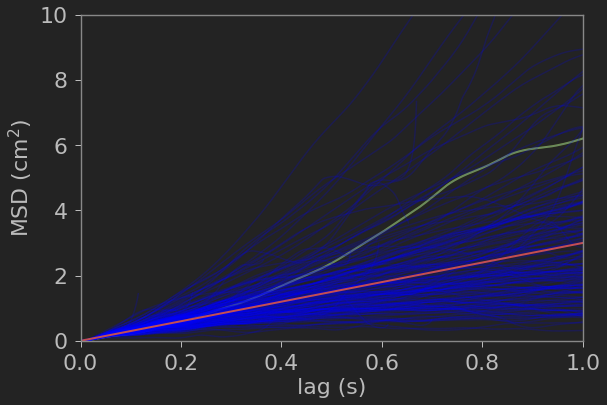

In [159]:
# plot msd for each trial versus lag
saving = False
V_thresh=0.4
savefig_fn = os.path.basename(input_file_name).replace('.csv','_short_time.svg')
savefig_folder = os.path.join(nb_dir,f'Figures/msd/V_{V_thresh}')
fontsize =22
figsize=(9,6)

fig, ax = plt.subplots(figsize=figsize)
# x_values = ef.index.values#*DT/10**3 #lag in seconds
# y_values = ef.values#*DS**2 #msd
ax.plot(t_values,msd_values,c='g',lw=2)

for src in src_lst:
    x_values = df[df.src==src].lagt.values
    y_values = df[df.src==src].msd.values
    ax.plot(x_values,y_values,c='blue',alpha=0.2)
# DS = 5/200 #cm per pixel
# DT = 1. #ms per frame
# D = 1/0.013# param set 8 ds 5
D=0.6/0.2
ax.plot(t_values,t_values*D,c='r',lw=2)


ax.set_xlim([0,1.])#.2])
ax.set_ylim([0,10])#1])
ax.set_xlabel('lag (s)', fontsize=fontsize)
ax.set_ylabel(r'MSD (cm$^2$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")

_Schema_:
- src
    - duration_of_traj
    - D_expval
    - D_stderr
    - intercept
    - r_value
    - p_value

In [116]:
# _Schema_:
{src:{
    "duration_of_traj":duration_of_traj,
    "D_expval":D_expval,
    "D_stderr":D_stderr,
    "intercept":intercept,
    "Rsquared":r_value**2,
    "p_value":p_value
}}

{'ic_200x200.019.22_traj_sr_400_mem_2.csv': {'duration_of_traj': 3.695,
  'D_expval': 4.704938247930185,
  'D_stderr': 0.02563458304621069,
  'intercept': 0.18092123838629748,
  'Rsquared': 0.975444814627612,
  'p_value': 0.0}}

It appears that changing the param set changed the diffcoef of spiral tips.  I would expect changing the domain size does not change the diffcoef of spiral tips.

In [ ]:
def compute_diffcoef(t_values,msd_values):pass
assert(t_values.shape==msd_values.shape)

## visualize diffusion coefficients for all trials in a data run

In [283]:
folder_name="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/msd"
os.chdir(folder_name)
df_dir='diffcoeff_emsd_longest_by_trial_tips_ntips_1.csv'
# df_dir=savefn

df=pd.read_csv(df_dir,index_col=0)

In [284]:
#filter results by whether a D_expval was found
print(f"""num. trials that didn't show a tip lasing longer than 150ms
is {df[df.D_expval<-1000].N.size}.""")
df=df[df.D_expval>=-1000].copy()

num. trials that didn't show a tip lasing longer than 150ms
is 2.


In [285]:
#filter results by whether a D_expval was found
R2_thresh=0.94
print(f"""num. trials that didn't show am Rsquared of at least {R2_thresh} is {df[df.D_expval<R2_thresh].N.size}.""")
df=df[df.Rsquared>=R2_thresh].copy()

num. trials that didn't show am Rsquared of at least 0.94 is 13.


In [286]:
#plot results
x_values= df.duration_of_traj.values
y_values= df.D_expval.values
yerr_values= df.D_stderr.values

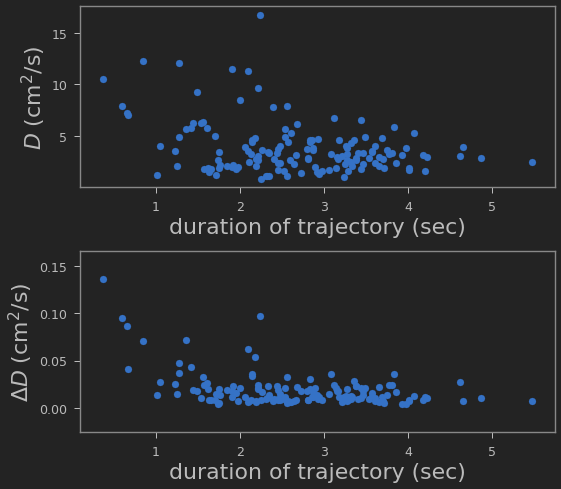

In [287]:
fontsize=22
fig,axs=plt.subplots(2)
ax=axs[0]
ax.scatter(x_values,y_values)
ax.set_xlabel('duration of trajectory (sec)',fontsize=fontsize)
ax.set_ylabel(r'$D$ (cm$^2$/s)',fontsize=fontsize)

ax=axs[1]
ax.scatter(x_values,yerr_values)
ax.set_xlabel('duration of trajectory (sec)',fontsize=fontsize)
ax.set_ylabel(r'$\Delta D$ (cm$^2$/s)',fontsize=fontsize)

plt.tight_layout()
plt.show()



In [302]:
duration_thresh=2.5#seconds

print(f"it appears that the stderr of D is large for tips lasting less than 2.5 seconds")
#filter trajectories shorter than 2.5 seconds in duration
print(f"""filtering {} trajectories shorter than {duration_thresh:.1f} seconds in duration""")
df=df[df.duration_of_traj>=duration_thresh].copy()

it appears that the stderr of D is large for tips lasting less than 2.5 seconds
filter trajectories shorter than 2.5 seconds in duration


In [303]:
#TODO: plot histogram of these diffusion coefficients against their uncertainties
x_values= df.duration_of_traj.values
y_values= df.D_expval.values
yerr_values= df.D_stderr.values

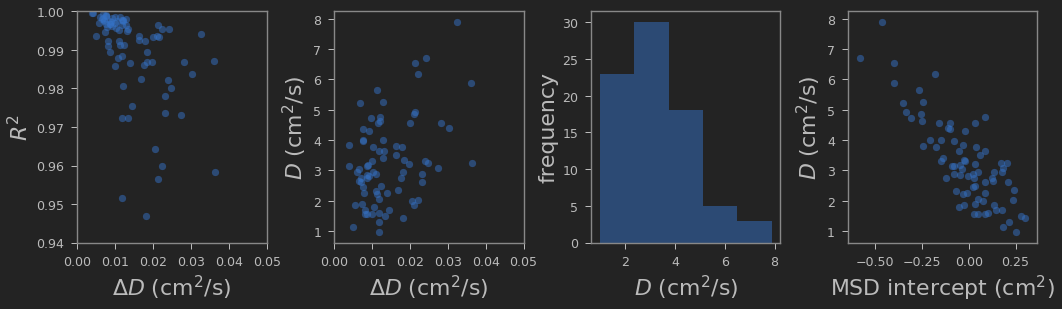

In [304]:
fontsize=22
figsize=(15,4.5)
fig,axs=plt.subplots(ncols=4,figsize=figsize)

ax=axs[0]
ax.scatter(yerr_values,df.Rsquared.values, alpha=0.5)
ax.set_xlabel(r'$\Delta D$ (cm$^2$/s)',fontsize=fontsize)
ax.set_ylabel(r'$R^2$',fontsize=fontsize)
ax.set_ylim([R2_thresh,1])
ax.set_xlim([0,0.05])

ax=axs[1]
ax.scatter(yerr_values,y_values, alpha=0.5)
ax.set_xlabel(r'$\Delta D$ (cm$^2$/s)',fontsize=fontsize)
ax.set_ylabel(r'$D$ (cm$^2$/s)',fontsize=fontsize)
ax.set_xlim([0,0.05])

ax=axs[2]
ax.hist(y_values,bins=5, alpha=0.5)
ax.set_ylabel(r'frequency',fontsize=fontsize)
ax.set_xlabel(r'$D$ (cm$^2$/s)',fontsize=fontsize)

ax=axs[3]
ax.scatter(df.intercept.values,y_values, alpha=0.5)
ax.set_xlabel(r'MSD intercept (cm$^2$)',fontsize=fontsize)
ax.set_ylabel(r'$D$ (cm$^2$/s)',fontsize=fontsize)

plt.tight_layout()
plt.show()

In [28]:
num_trials_considered=df.N.values.shape[0]
print(f"number of trials considered = {num_trials_considered}.")
c=df.describe().T[['mean','std']].T

NameError: name 'df' is not defined

In [27]:
# input_file_name='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/msd/emsd_longest_by_trial_tips_ntips_1.csv'
sl=input_file_name.split('/')
trial_name=sl[-3]
n_tips=eval(sl[-1][sl[-1].find('ntips_')+len('ntips_'):].split('.')[0])
mean_D, stdev_D=c[['D_expval']].values
mean_D=float(mean_D);stdev_D=float(stdev_D)
mean_stderr_D=float(c[['D_stderr']].values[0])
stdev_stderr_D=float(c[['D_stderr']].values[1])
num_trials_considered=df.N.values.shape[0]

df_out=pd.DataFrame({'trial_folder_name':[trial_name], 'n_tips':[n_tips],
                     "mean_D":[mean_D], "stdev_D":[stdev_D], 
                     "mean_stderr_D":[mean_stderr_D], "stdev_stderr_D":[stdev_stderr_D],
                    "num_trials_considered":[num_trials_considered],
                    "num_trials_computed":[171], 
                     "tau_min":[tau_min],"tau_max":[tau_max],
                     "R2_thresh":[R2_thresh], "duration_thresh":[duration_thresh]})

NameError: name 'c' is not defined

In [ ]:
# diffcoeff_fn_base="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/msd/diffcoeff_emsd_longest_by_trial_tips_ntips_1_Tmin_0.15_Tmax_0.5.csv"
# foo_dfn=lambda trial_folder_name:diffcoeff_fn_base.replace('ds_5_param_set_4',trial_folder_name)


# trial_folder_name_lst=[
#     'ds_5_param_set_8_fastkernel_V_0.5_archive',
#     'ds_5_param_set_4'
# ]

In [344]:
#TODO: save output
df_out


#TODO: repeat all ^this for different simulation conditions completed

,trial_folder_name,n_tips,mean_D,stdev_D,mean_stderr_D,stdev_stderr_D,num_trials_considered,num_trials_computed,tau_min,tau_max,R2_thresh,duration_thresh
0,ds_5_param_set_8_fastkernel_V_0.4_archive,1,3.275622,1.407308,0.014265,0.007477,79,171,0.15,0.5,0.94,2.5


In [345]:
# other things to quantify...
#TODO: compute the interaction/creation/destruction ranges
#TODO: measure speed as a function of time when two tips pair-create 
#TODO: measure speed as a function of time when two tips pair-annihilate

#TODO: get the longest lasting unwrapped tip trajectory for a given src
#TODO(later): develop method of detecting pauses in an unwrapped trajectory 
#TODO: compute the mean time between pauses
#TODO: compute the mean duration of pauses

#DONT(stupid): visualize spiral tip speed (realtime) versus D (lagtime)


In [67]:
# #DONE: check on pipeline output

# diffcoeff_fn_base="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/msd/diffcoeff_emsd_longest_by_trial_tips_ntips_1_Tmin_0.15_Tmax_0.5.csv"
# input_file_name=diffcoeff_fn_base

# #TODO: save df_out in initial-conditions-2/
# sl=input_file_name.split('/')
# trial_folder_name=sl[-4]
# save_folder_table = os.path.join(nb_dir,f'Figures/msd/'+trial_folder_name)
# file_out=save_folder_table+'/avg-diffcoeff-table.csv'
# # os.path.dirname(input_file_name)

'/home/timothytyree/Documents/GitHub/care/notebooks/Figures/msd/initial-conditions-suite-2'

In [3]:
#TODO: save ^those images
#TODO: check ^those images saved correctly

#TODO: check on LR simulation
from lib.routines.dag_log_to_msd import *
from lib.routines.compute_msd import *

In [6]:
#compute mean squared displacements, aggregating results
n_tips=1; DT=1.
# file_out=output_file_name_list[0]
file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_1_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
retval=gen_msd_figs(file_out,n_tips, DT)#, V_thresh=0.4)

Num. file names in list = 171.
ValueError: No objects to concatenate
	trial that failed: ic_200x200.008.12_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic_200x200.011.31_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic_200x200.018.31_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic_200x200.011.33_traj_sr_400_mem_0_unwrap.csv
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_long_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_short_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_very_short_time_std.png


In [12]:
beep(3)
!pwd

/home/timothytyree/Documents/GitHub/care/notebooks/Figures/msd/ds_1_param_set_8


## TODO(later): compute interaction ranges

In [8]:
#let's view on eof those trajectories that failed to concat
#frame numbering appears to be wrong
file_sus='ic_200x200.008.12_traj_sr_400_mem_0_unwrap.csv'
df_traj=get_longest_trajectories(file_out,n_tips = 1,DS = 5/200,DT = 1., round_t_to_n_digits=0)


In [24]:
from lib.routines.compute_interactions import *
# TODO: crop trajectories before deciding which is longest
folder='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_og/trajectories'
os.chdir(folder)
file_sus='ic_200x200.008.12_traj_sr_400_mem_0.csv'
compute_df_interactions(file_sus,DS=5./200.)

,pid,pid_birthmate,pid_deathmate,r0,rT,Tavg,Tdiff


## (ignore, moved earlier): compute msd for given trial_folder

In [14]:
file_in=search_for_file()
trgt='_unwrap.csv'
assert(file[-len(trgt):]==trgt)
file

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/trajectories/ic_200x200.001.11_traj_sr_400_mem_0_unwrap.csv


In [40]:
#compute mean squared displacements, aggregating results
n_tips=1; DT=1.
# output_file_name_list[0]
file_in=input_file_name
# file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_1_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
# file_out='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/trajectories/ic_200x200.011.11_traj_sr_400_mem_0_unwrap.csv'
retval=gen_msd_figs(file_in,n_tips, DT)#, V_thresh=0.4)

Num. file names in list = 171.
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_long_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_short_time_std.png
saved figure in 
	emsd_longest_by_trial_tips_ntips_1_very_short_time_std.png


# generate diffusion coefficient table

In [3]:
from lib.routines.dag_log_to_msd import *

In [96]:
os.path.dirname(nb_dir)

'/home/timothytyree/Documents/GitHub/care'

In [97]:
input_folder=f"{nb_dir}/Data/initial-conditions-suite-2"
retval= gen_diffcoeff_table(input_folder)
beep(7)

TypeError: generate_diffcoeff_figures() missing 1 required positional argument: 'dir_out'

In [82]:
#TODO: debug gen_diffcoeff_table.  it is saving empty rows.
df=pd.read_csv('/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/avg-diffcoeff-table.csv')
df

,Unnamed: 0,trial_folder_name,n_tips,mean_D,stdev_D,mean_stderr_D,stdev_stderr_D,num_trials_considered,num_trials_computed,tau_min,tau_max,R2_thresh,duration_thresh
0,0,ds_5_param_set_8_fastkernel_V_0.4_archive,1,3.275622,1.407308,0.014265,0.007477,79,171,0.15,0.5,0.94,2.5
1,0,ds_5_param_set_8_fastkernel_V_0.5_archive,1,3.143848,1.394320,0.014002,0.007125,67,171,0.15,0.5,0.94,2.5
2,0,ds_5_param_set_8_fastkernel_V_0.6_archive,1,2.978615,0.971810,0.015702,0.006242,51,171,0.15,0.5,0.94,2.5
3,0,ds_5_param_set_8_og,1,5.059754,1.818385,0.022178,0.008431,22,171,0.15,0.5,0.94,2.5
4,0,ds_5_param_set_4,1,NaN,NaN,NaN,NaN,0,171,0.15,0.5,0.94,2.5
5,0,ds_2_param_set_8,1,NaN,NaN,NaN,NaN,0,171,0.15,0.5,0.94,2.5
6,0,ds_1_param_set_8,1,NaN,NaN,NaN,NaN,0,171,0.15,0.5,0.94,2.5


In [84]:
gen_diffcoeff_table

<function lib.routines.dag_log_to_msd.gen_diffcoeff_table(input_folder, **kwargs)>

### TODO: debug gen_diffcoeff_table.  it is saving empty rows.
- ds_1_param_set_8 is printed in every row
- nan mean_D recorded in every row

In [3]:
# TODO: get all folders in the cwd containing the pattern 'ds_'
fn=search_for_file()

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4/msd/emsd_longest_by_trial_tips_ntips_1.csv


In [5]:
input_file_name=fn
df=pd.read_csv(input_file_name)
df.head()

,msd,lagt,src
0,0.003831,0.001,ic016.22_traj_sr_400_mem_0_unwrap.csv
1,0.014119,0.002,ic016.22_traj_sr_400_mem_0_unwrap.csv
2,0.029202,0.003,ic016.22_traj_sr_400_mem_0_unwrap.csv
3,0.047560,0.004,ic016.22_traj_sr_400_mem_0_unwrap.csv
4,0.067110,0.005,ic016.22_traj_sr_400_mem_0_unwrap.csv


In [11]:

trial_folder_name

'ds_5_param_qu_tmax_30_Ko_5.4'

In [19]:
#TODO: generate fn='emsd_...' functionally using a dask bag
#TODO: test runtime of ^that naively
#TODO(later): determine which jobs need given to a dask bag ahead of time?
from lib.routines.compute_diffcoef import *
input_file_name=fn#f"{nb_dir}/Data/"
fn2= compute_diffusion_coeffs(input_file_name,tau_min=.15,tau_max=0.5)
sl=input_file_name.split('/')
trial_folder_name=sl[-3]
input_file_name=os.path.abspath(fn2)
retval= generate_diffcoeff_figures(input_file_name,trial_folder_name,tau_min=.15,tau_max=0.5,saving=True,
        R2_thresh=0.4,duration_thresh=0.,fontsize=22,figsize_2=(15,4.5))


generating diffcoeff_figures for ds_5_param_qu_tmax_30_Ko_5.4
	num. trials that didn't show a tip lasing longer than 150ms is 0, and that didn't show am Rsquared of at least 0.4 is 12
saved diffcoeff_summary to 
the total number of trials considered in summary is 29


In [20]:
df=pd.read_csv(retval)

In [21]:
df.head()

,Unnamed: 0,trial_folder_name,n_tips,mean_D,stdev_D,mean_stderr_D,stdev_stderr_D,num_trials_considered,num_trials_computed,tau_min,tau_max,R2_thresh,duration_thresh
0,0,ds_5_param_qu_tmax_30_Ko_5.4,1,59.925997,186.34651,5.849502,7.509228,29,155,0.15,0.5,0.4,0.0


In [83]:
#MSD intercept is stable and normal for all but a couple funny trials that I'm guessing I'm already filtering.
# plt.subplots(figsize=(3.5,3))
# plt.hist(df[df.intercept>-1].intercept.values,bins=10)
# plt.xlabel(r'MSD intercept (cm$^2$/s)')
# plt.ylabel('frequency')
# plt.show()

In [57]:
here_dir=os.path.dirname(os.path.abspath(input_file_name))
savefig_folder = os.path.join(here_dir,'fig')#f'Figures/msd/'+trial_folder_name)
# if not os.path.exists(savefig_folder):
savefig_folder

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/msd/fig/fig'

## step through routine being used to make diffusion coefficient figures, and make it always give real output
- default method of detecting spiral tips is not effective here
- TODO: plot MSD
- TODO: determine which trials look diffusive
- TODO: estimate the avg(+-std) diffcoeff for that trial. record

In [22]:
#import emsd_fn
fn=search_for_file()#os.path.dirname(fn))

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4/msd/emsd_longest_by_trial_tips_ntips_1.csv


In [23]:
df=pd.read_csv(fn,index_col=False)
df.head()

,msd,lagt,src
0,0.003831,0.001,ic016.22_traj_sr_400_mem_0_unwrap.csv
1,0.014119,0.002,ic016.22_traj_sr_400_mem_0_unwrap.csv
2,0.029202,0.003,ic016.22_traj_sr_400_mem_0_unwrap.csv
3,0.047560,0.004,ic016.22_traj_sr_400_mem_0_unwrap.csv
4,0.067110,0.005,ic016.22_traj_sr_400_mem_0_unwrap.csv


In [117]:
t_values, msd_values, std_values = compute_average_std_msd(df,DT)
#     t_values, msd_values = compute_average_msd(df, DT=1.)

sl=input_file_name.split('/')
trial_folder_name=sl[-3]

os.chdir(save_folder)
savefig_folder='fig'
# if not os.path.exists(savefig_folder):
#     os.mkdir(savefig_folder)
# os.chdir(savefig_folder)
savefig_folder=os.getcwd()
# generate plots of msd's
savefig_fn = os.path.basename(output_file_name).replace('.csv','_myview.png')

retval = PlotMSD(df, t_values, msd_values, std_values, savefig_folder,savefig_fn,xlim = [0,0.2],ylim=[0,1],saving = False,fontsize =22,figsize=(9,6),D=3.5)


NameError: name 'DT' is not defined

In [112]:
# D_values=df[(df.D_expval>-100)&(df.D_expval<100)].D_expval.values

In [11]:
retval=gen_msd_figs(fn,n_tips=1,DT=2.)

Num. file names in list = 159.
ValueError: No objects to concatenate
	trial that failed: ic005.33_traj_sr_400_mem_0_unwrap.csv
ValueError: No objects to concatenate
	trial that failed: ic008.21_traj_sr_400_mem_0_unwrap.csv


ValueError: Invalid file path or buffer object type: <class 'float'>

In [10]:
retval = PlotMSD(df, t_values, msd_values, std_values, savefig_folder,savefig_fn,xlim = [0,0.2],ylim=[0,1],saving = True,fontsize =22,figsize=(9,6),D=3.5)


'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4/trajectories_unwrap/ic001.21_traj_sr_400_mem_0_unwrap.csv'

## do there exist tips in the 900x900 (still wrapped)LR trajectories that last for more than 300ms?
- if so, what about in the unwrapped trajectories

In [16]:
file=search_for_file()

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-lr-300x300/param_qu_tmax_30/Log/ic300x300.0.0_traj_sr_600_mem_0_unwrap.csv


In [17]:
trgt='_unwrap.csv'
input_fn_lst=get_all_files_matching_pattern(file,trgt)
len(input_fn_lst)

144

In [18]:
fn=input_fn_lst[0]
df=pd.read_csv(fn)
df.head()

,t,n,x,y,grad_ux,grad_uy,grad_vx,grad_vy,frame,particle
0,100.1,14,0.000000,0.000000,-12.929629,2.092927,0.554988,1.034923,0,0
1,102.1,14,0.206456,0.090404,-1.658291,1.216451,1.165742,0.986391,1,0
2,104.1,16,0.874516,0.911988,-1.025610,1.169340,1.165411,0.986151,2,0
3,106.1,14,2.259772,1.904244,-0.922982,1.180725,1.305036,0.972071,3,0
4,108.1,14,3.177685,2.306984,-0.515321,1.149242,3.507548,0.758648,4,0


In [19]:
#TODO: compute the length of each pid
# df.particle.values
DT=2
lifetime_values=df.groupby('particle').x.count().values*DT

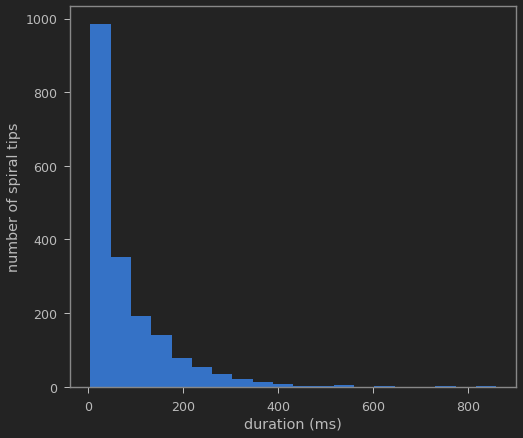

860


In [20]:
plt.hist(lifetime_values,bins=20)
plt.xlabel('duration (ms)')
plt.ylabel('number of spiral tips')
plt.show()
print(np.max(lifetime_values))

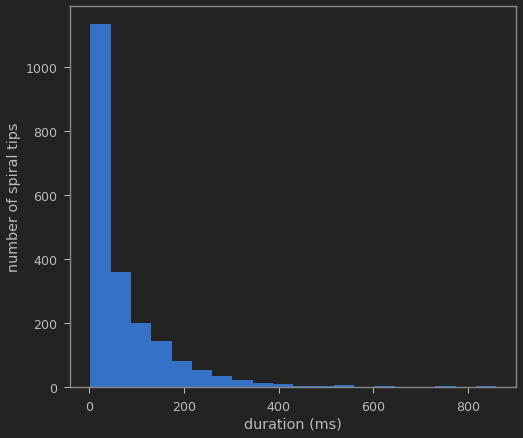

860


In [21]:
#view the corresponding histogram for the wrapped trajectories
# trgt='_unwrap.csv'
# input_fn_lst=get_all_files_matching_pattern(file,trgt)
# len(input_fn_lst)

# fn=input_fn_lst[0]
fn2=fn.replace('_unwrap','')
df=pd.read_csv(fn2)
df.head()

#TODO: compute the length of each pid
# df.particle.values
DT=2
lifetime_values=df.groupby('particle').x.count().values*DT

plt.hist(lifetime_values,bins=20)
plt.xlabel('duration (ms)')
plt.ylabel('number of spiral tips')
plt.show()
print(np.max(lifetime_values))

In [13]:
#thus, the problem isn't from the unwrapping...
#TODO: visualize the spiral tips in a .gif for the LR model. 
#TODO: verify whether ^these spiral tips are reasonable
#TODO(failing ^that): consider coloring by spiral tip index using attentional algorithm
#TODO: verify whether ^these spiral tip trajectories are reasonable
#TODO(finally): implement attentional spiral tip detection algorithm in python (maybe later, C++, and then CUDA)


__Results__ _R makes tips too brief to give nice MSD traces_
- the 600x600 LR trial exhibited spiral tips with a longest apparent lifetime of ~800ms...  Not quite long enough to get beautiful MSD curves...
- the 300x300 LR trial exhibited spiral tips with a longest apparent lifetime of ~800ms...  Not quite long enough to get beautiful MSD curves...

thus, either something is wrong with tip tracking or these tips from the standard LR are not lasting long enough to get a nice MSD curve that D can be extracted from.

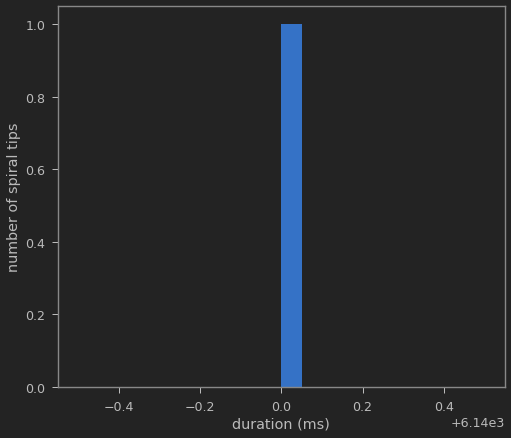

6140


NameError: name 'fn' is not defined

In [319]:
# # do there exist tips in the 900x900 (still wrapped)LR trajectories that last for more than 300ms?
# # - if so, what about in the unwrapped trajectories

# file=search_for_file()

# trgt='_unwrap.csv'
# input_fn_lst=get_all_files_matching_pattern(file,trgt)
# len(input_fn_lst)

# fn=input_fn_lst[0]
# df=pd.read_csv(fn)
# df.head()

#TODO: compute the length of each pid
# df.particle.values
DT=2
lifetime_values=df.groupby('particle').x.count().values*DT

plt.hist(lifetime_values,bins=20)
plt.xlabel('duration (ms)')
plt.ylabel('number of spiral tips')
plt.show()
print(np.max(lifetime_values))

#view the corresponding histogram for the wrapped trajectories
# trgt='_unwrap.csv'
# input_fn_lst=get_all_files_matching_pattern(file,trgt)
# len(input_fn_lst)

# fn=input_fn_lst[0]
fn2=fn.replace('_unwrap','')
df=pd.read_csv(fn2)
df.head()

#TODO: compute the length of each pid
# df.particle.values
DT=2
lifetime_values=df.groupby('particle').x.count().values*DT
plt.hist(lifetime_values,bins=20)
plt.xlabel('duration (ms)')
plt.ylabel('number of spiral tips')
plt.show()
print(np.max(lifetime_values))

#thus, the problem isn't from the unwrapping...
#TODO: visualize the spiral tips in a .gif for the LR model. 
#TODO: verify whether ^these spiral tips are reasonable
#TODO(failing ^that): consider coloring by spiral tip index using attentional algorithm
#TODO: verify whether ^these spiral tip trajectories are reasonable
#TODO(finally): implement attentional spiral tip detection algorithm in python (maybe later, C++, and then CUDA)


# __Results__ _R makes tips too brief to give nice MSD traces_
# - the 600x600 LR trial exhibited spiral tips with a longest apparent lifetime of ~800ms...  Not quite long enough to get beautiful MSD curves...
# - the 300x300 LR trial exhibited spiral tips with a longest apparent lifetime of ~800ms...  Not quite long enough to get beautiful MSD curves...

# thus, either something is wrong with tip tracking or these tips from the standard LR are not lasting long enough to get a nice MSD curve that D can be extracted from.



## TODO: measure quasiperiodic diffusion coefficients using thresholded tau_min/max
TODO: measure ~6 manually for FK param_set_4 (quasiperiodic meander phase)
- 1) plot msd for jth trial, 
- 2) input tau_min/max, 
- 3) measure/record D

(Better)
- set tau_min = first tau where MSD becomes greater than MSD_thresh=1 cm^2
- set tau_max= tau_min + 500 ms (visually chosen)
- todo(later) fit an exponential to the MSD curves

In [50]:
from scipy import stats

In [8]:
file=search_for_file()
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/trajectories/ic_200x200.001.22_traj_sr_400_mem_0.csv'

L=200
DT=1

#measure the mean/max lifetime of the longest tip for a folder of tip logs
trgt=file[-8:]#'mem_0.csv'
input_fn_lst=get_all_files_matching_pattern(file,trgt)

df=pd.read_csv(file)
len(input_fn_lst)


File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/msd/emsd_longest_by_trial_tips_ntips_1.csv


2

In [83]:
#TODO: use 
MSD_thresh=1.;
DT=1.
y_thresh=MSD_thresh
src_lst=list(set(df.src.values))
print(len(src_lst))
D_expval_lst=[];D_stderr_lst=[];tau_min_lst=[];tau_max_lst=[];delta_tau_lst=[]
for src in src_lst:
    x_values=df[df.src==src].lagt.values
    y_values=df[df.src==src].msd.values
    boo_meanders=(y_values>y_thresh).any()
    if boo_meanders:
        #TODO: measure D

        # plt.plot(x_values,np.sqrt(y_values)/DT,label='speed (cm/ms)')
        #         plt.plot(x_values,y_values,label='MSD (cm/ms)')
        #choose tau_max
        tau_min=x_values[np.argwhere(y_values-MSD_thresh>0)[0,0]]
        tau_max=tau_min+0.5
        last_tau=x_values[-1]
        if tau_max>last_tau:
            tau_max=last_tau
    
        #TODO: copy old method of computing slope with scipy
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
        #    std_err: D_stderr : Standard error of the estimated gradient.
        #    slope  : D_expval : diffcoef of msd curve
        D_expval=slope
        D_stderr=std_err
        delta_tau=tau_max-tau_min
        D_expval_lst.append(D_expval)
        D_stderr_lst.append(D_stderr)
        tau_min_lst.append(tau_min)
        tau_max_lst.append(tau_max)
        delta_tau_lst.append(tau_max-tau_min)
# plt.show()
beep(2)

171


0

In [93]:
print('considering only the trials meandered for at least 500 ms after being unhinged')
boo=np.array(delta_tau_lst)==0.5
len(boo[boo])
print(f"N={len(boo[boo])}")
print(f'the mean diffusion coefficient is {np.mean(np.array(D_expval_lst)[boo])}')
print(f'the stdev diffusion coefficient is {np.std(np.array(D_expval_lst)[boo])}')
print(f'the mean diffusion coefficient is {np.mean(np.array(D_stderr_lst)[boo])}')
print(f'the stdev diffusion coefficient is {np.std(np.array(D_stderr_lst)[boo])}')

considering only the trials meandered for at least 500 ms after being unhinged
N=16
the mean diffusion coefficient is 3.9428444969659973
the stdev diffusion coefficient is 3.6360868417711543
the mean diffusion coefficient is 0.06468809621217887
the stdev diffusion coefficient is 0.06745739504698757


In [95]:
D_expval_lst
D_stderr_lst
tau_min_lst
tau_max_lst
print(f"N={len(delta_tau_lst)}")
print(f'the mean diffusion coefficient is {np.mean(np.array(D_expval_lst))}')
print(f'the stdev diffusion coefficient is {np.std(np.array(D_expval_lst))}')
print(f'the mean diffusion coefficient is {np.mean(np.array(D_stderr_lst))}')
print(f'the stdev diffusion coefficient is {np.std(np.array(D_stderr_lst))}')

N=87
the mean diffusion coefficient is 1.9184477749455926
the stdev diffusion coefficient is 3.780892265056678
the mean diffusion coefficient is 0.045313863387011113
the stdev diffusion coefficient is 0.1140833712651235


In [64]:
delta_tau_lst
# lifetime_lst=[]
# for file in input_fn_lst:
#     df=pd.read_csv(file)
#     retval=get_longest_trajectories(file,width=L,height=L,DT=DT)
#     lifetime=DT*retval.t.count()
#     lifetime_lst.append(lifetime)
# beep(2)
boo_meanders

False

In [29]:
len(src_lst)

171

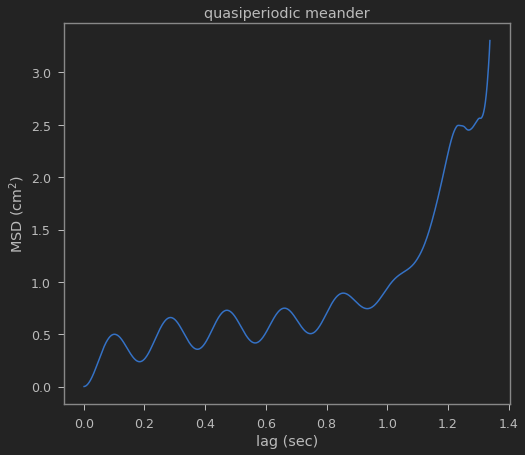

In [35]:
#TODO: measure D
x_values=df[df.src==src].lagt.values
y_values=df[df.src==src].msd.values
# plt.plot(x_values,np.sqrt(y_values)/DT,label='speed (cm/ms)')
plt.plot(x_values,y_values)

plt.xlabel('lag (sec)')
plt.ylabel(r'MSD (cm$^2$)')
plt.title('quasiperiodic meander')
# plt.legend()
plt.show()

In [48]:
MSD_thresh=1;
#choose tau_max
tau_min=x_values[np.argwhere(y_values-MSD_thresh>0)[0,0]]
tau_max=tau_min+0.5
last_tau=x_values[-1]
if tau_max>last_tau:
    tau_max=last_tau




In [53]:
#copy of method of computing slope with scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
#    std_err: D_stderr : Standard error of the estimated gradient.
#    slope  : D_expval : diffcoef of msd curve
D_expval=slope
D_stderr=std_err
D_expval

1.4291628874589464

In [52]:
D_stderr

0.02699978691946362

## TODO(later): compute speeds at the head/tail of the trajectory

# measure emsd/Dbar/Dbar versus Domain size using cloud_results
- input: unwrapped trajectories
- output: emsd, Dbar, Dbar

In [136]:
# file=search_for_file()
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/cloud_results/longest_traj_by_area_fk_pbc.csv'


In [137]:
DS=0.025
DT=2.

In [145]:
#TODO: import file of cloud results
df_all=pd.read_csv(file)
df=df_all
#assign a src to each setting
src_lst=list(zip(df.L.values,df.txt_id1.values,df.txt_id2.values))
df['src']=src_lst
df['area']=df.L**2*DS**2#cm^2
num_individuals=len(list(set(src_lst)))

print(f"the total num_individuals={num_individuals}")
# compute the value of all available L's
area_lst=list(set(df.area.values))
del df

#TODO: select all particles with constant setting (constant L)
#TODO: rename particles on the basis of constant L

the total num_individuals=530


In [146]:
# df.groupby('L')[['frame','x','y']]

In [184]:
num_individuals_thresh=3
MSD_thresh=.3
#TODO: compute Dbar and Delta_Dbar
D_expval_lst=[];D_stderr_lst=[];tau_min_lst=[];tau_max_lst=[];delta_tau_lst=[];area_lst_out=[];Rsq_lst=[];num_individuals_lst=[]
for area in area_lst:
    #     print(f'area is {area:.2f} cm^2')

    #compute which src values to use
    df=df_all[df_all.area==area].copy()
    src_lst=list(set(list(zip(df.L.values,df.txt_id1.values,df.txt_id2.values))))
    num_individuals=len(src_lst)
#     print(f"num_individuals={num_individuals}")
    if num_individuals>num_individuals_thresh:
        #rename particle by src (warning very slow)
        boo=False
        for n,src in enumerate(src_lst):
            boo|=df.src==src
            df.loc[df.src==src,'particle']=n
        traj=df[boo]

        # # alternative method #return the longest n tips (CAUTION: they may overlap)
        # traj=return_longest_n_and_truncate(file,n_tips=1,DS=DS,DT=DT,round_t_to_n_digits=1,width=L,height=L)

               #compute ensemble mean squared displacement
        emsd=compute_emsd(traj,DT=DT)
        if not emsd is None:
            retval= compute_Dbar(emsd,DT,MSD_thresh=MSD_thresh,max_lagtime=700)
            if retval is not None:
                D_expval,D_stderr,tau_min,tau_max,Rsquared,delta_tau=retval
                D_expval_lst.append(D_expval)
                D_stderr_lst.append(D_stderr)
                tau_min_lst.append(tau_min)
                tau_max_lst.append(tau_max)
                delta_tau_lst.append(tau_max-tau_min)
                area_lst_out.append(area)
                Rsq_lst.append(Rsquared)
                num_individuals_lst.append(num_individuals)

In [185]:
# Rsq_lst
# delta_tau_lst

In [186]:
#visualize Dbar of emsd
df_out=pd.DataFrame({
    'area':area_lst_out,
    'Dbar':D_expval_lst,
    'Delta_Dbar':D_stderr_lst,
    'tau_min':tau_min_lst,
    'tau_max':tau_max_lst,
    'Rsq':Rsq_lst,
    'delta_tau':delta_tau_lst,
})
df_out.sort_values(by='area',inplace=True)

cloud results for Fenton-Karma model
mean uncertainty in slope = 0.0289 cm^2/s
slope uncertainty of poster child = 0.02 cm^2/s


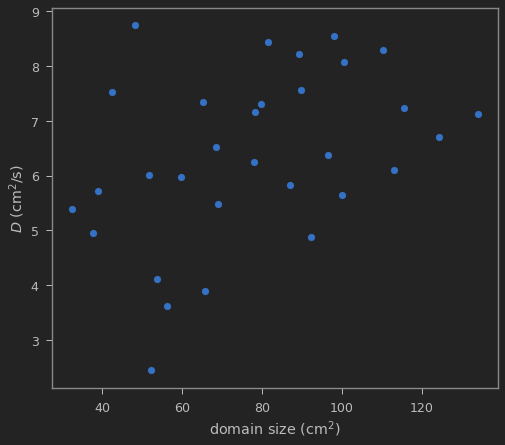

In [189]:

x_values=df_out.area.values
y_values=df_out.Dbar.values*10**3
yerr_values=df_out.Delta_Dbar.values*10**3

print('cloud results for Fenton-Karma model')
print(f'mean uncertainty in slope = {np.mean(yerr_values):.4f} cm^2/s')
print(f"slope uncertainty of poster child = 0.02 cm^2/s")
# plt.errorbar(x_values,y_values,yerr_values,label='long lived spiral tips')
plt.scatter(x_values,y_values,label='long lived spiral tips')
# plt.plot(x_values,0.0005+0*y_values,c='r',label='transmembrane voltage')
plt.xlabel(r'domain size (cm$^2$)')
plt.ylabel(r'$D$ (cm$^2$/s)')
# plt.ylabel(r'$\bar{D}$ (cm$^2$/s)')
# plt.legend()
plt.show()


In [190]:
save_folder=os.path.dirname(file)
os.chdir(save_folder)

#save csv
fn=os.path.basename(file)
save_fn='diffusion_coefficients_'+fn[fn.find('by'):]
df.to_csv(save_fn,index=False)
print(os.path.abspath(save_fn))

/home/timothytyree/Documents/GitHub/care/notebooks/Data/cloud_results/diffusion_coefficients_by_area_fk_pbc.csv


109.20250000000001


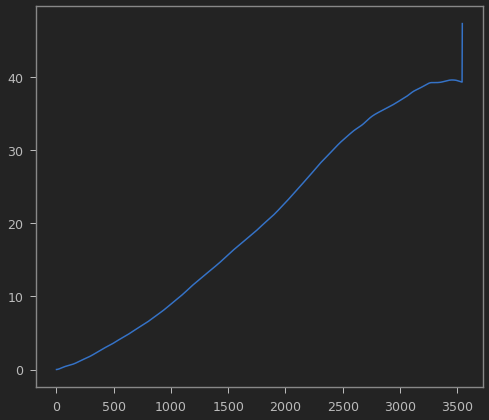

In [192]:
#consider caching results 
#TODO: switch the order of renaming particles and selecting given area
print(area)
x_values=emsd.index.values*DT
y_values=emsd.values*DS**2
plt.plot(x_values,y_values)

## compute diffusion coefficients in the quasimeander phase

In [187]:
# # file=search_for_file()
# # file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/trajectories/ic_200x200.001.22_traj_sr_400_mem_0.csv'
# # L=200

#import a folder of tip logs
trgt=file[-8:]#'mem_0.csv'
input_fn_lst=get_all_files_matching_pattern(file,trgt)

df=pd.read_csv(file)
print(f"len(input_fn_lst)= {len(input_fn_lst)}")

DT=np.diff(df[df.particle==0].t.values)[0]
DS=0.025
print(f"DT={DT}")

len(input_fn_lst)= 2
DT=2.0


In [108]:
L=eval(input(f"please enter L="))
type(L)

please enter L=200


int

,index,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
18325,18325,1357.6,4,-37.62248,21.84555,-9999.0,0.20340,1.26037,5.77511,-0.59803,0.38406,0.01083,0.82983,0.00173,-0.00083,-0.00104,3394,69
18326,18326,1358.0,4,-37.56527,21.83569,-9999.0,0.24053,1.24816,6.76276,-0.93746,0.38730,0.01062,0.82963,0.00143,-0.00082,-0.00104,3395,69
18327,18327,1358.4,4,-37.50085,21.82245,-9999.0,0.27636,1.23637,8.21938,-1.43983,0.39070,0.01043,0.82947,0.00110,-0.00080,-0.00104,3396,69
18328,18328,1358.8,4,-37.42922,21.80539,-9999.0,0.31096,1.22498,10.61184,-2.26735,0.39420,0.01026,0.82936,0.00073,-0.00079,-0.00104,3397,69
18329,18329,1359.2,4,-37.35062,21.78417,-9999.0,0.34442,1.21397,15.16717,-3.84700,0.39776,0.01010,0.82932,0.00033,-0.00077,-0.00104,3398,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19449,19449,1807.2,2,31.28804,-57.00568,-9999.0,8.97716,-3.05927,1.05553,0.97183,0.33607,0.04193,0.81011,0.00011,-0.00322,-0.00101,4518,69
19450,19450,1807.6,2,31.34049,-56.86170,-9999.0,12.84702,-5.01768,0.98724,1.00644,0.42664,0.05859,0.82003,0.00001,-0.00450,-0.00103,4519,69
19451,19451,1808.0,2,31.39557,-56.72393,-9999.0,14.95771,-6.08962,1.02031,0.98976,0.41823,0.05719,0.81950,0.00000,-0.00439,-0.00102,4520,69
19452,19452,1808.4,2,31.45385,-56.58424,-9999.0,17.88771,-7.57743,1.05253,0.97355,0.40995,0.05589,0.81901,0.00001,-0.00429,-0.00102,4521,69


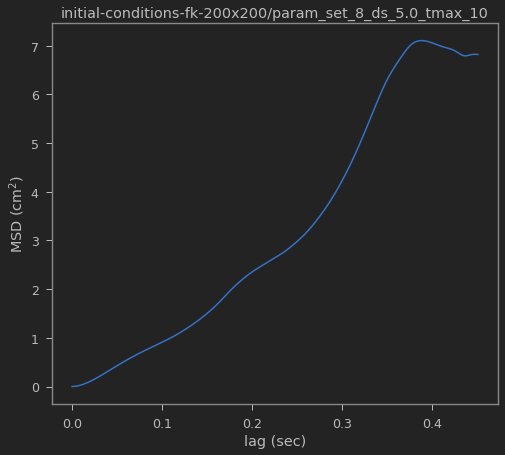

In [182]:
t_values=emsd.index.values*DT/10**3#seconds
msd_values=emsd.values*DS**2#cm^2
trgt='Data/'
title_string=os.path.join(*file[file.find(trgt)+len(trgt):].split('/')[:2])

# plt.plot(t_values,np.sqrt(msd_values))
plt.plot(t_values,msd_values)
plt.xlabel('lag (sec)')
plt.ylabel(r'MSD (cm$^2$)')
plt.title(title_string)
# plt.legend()
plt.show()

In [ ]:
D_exp

In [ ]:
#THIS MIGHT BE AN UNNECESSARY COPY FROMEARLIER IN THIS NB
MSD_thresh=1.;
DT=1.
y_thresh=MSD_thresh
src_lst=list(set(df.src.values))
print(len(src_lst))
D_expval_lst=[];D_stderr_lst=[];tau_min_lst=[];tau_max_lst=[];delta_tau_lst=[]
for src in src_lst:
    x_values=df[df.src==src].lagt.values
    y_values=df[df.src==src].msd.values
    boo_meanders=(y_values>y_thresh).any()
    if boo_meanders:
        #TODO: measure D

        # plt.plot(x_values,np.sqrt(y_values)/DT,label='speed (cm/ms)')
        #         plt.plot(x_values,y_values,label='MSD (cm/ms)')
        #choose tau_max
        tau_min=x_values[np.argwhere(y_values-MSD_thresh>0)[0,0]]
        tau_max=tau_min+0.5
        last_tau=x_values[-1]
        if tau_max>last_tau:
            tau_max=last_tau
    
        #TODO: copy old method of computing slope with scipy
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
        #    std_err: D_stderr : Standard error of the estimated gradient.
        #    slope  : D_expval : diffcoef of msd curve
        D_expval=slope
        D_stderr=std_err
        delta_tau=tau_max-tau_min
        D_expval_lst.append(D_expval)
        D_stderr_lst.append(D_stderr)
        tau_min_lst.append(tau_min)
        tau_max_lst.append(tau_max)
        delta_tau_lst.append(tau_max-tau_min)
# plt.show()
beep(2)

print('considering only the trials meandered for at least 500 ms after being unhinged')
boo=np.array(delta_tau_lst)==0.5
len(boo[boo])
print(f"N={len(boo[boo])}")
print(f'the mean diffusion coefficient is {np.mean(np.array(D_expval_lst)[boo])}')
print(f'the stdev diffusion coefficient is {np.std(np.array(D_expval_lst)[boo])}')
print(f'the mean diffusion coefficient is {np.mean(np.array(D_stderr_lst)[boo])}')
print(f'the stdev diffusion coefficient is {np.std(np.array(D_stderr_lst)[boo])}')

## TODO: move on with next part of the SCRUM

In [100]:
#TODO: check whether mean of average equals average of mean

In [355]:
df_all[df_all.area==area]

,L,txt_id1,txt_id2,t,n,x,y,grad_ux,grad_uy,grad_vx,grad_vy,frame,particle,src,area
296768,375,3,4,20612.0,10,0.000000,0.000000,1.91054,-2.19189,1.64400,-1.26848,0,654,"(375, 3, 4)",87.890625
296769,375,3,4,20614.0,10,-4.089111,-3.666885,1.81308,-1.95983,1.45702,-0.68749,1,654,"(375, 3, 4)",87.890625
296770,375,3,4,20616.0,10,-7.009094,-6.597618,1.68045,-1.58357,1.33702,-0.30082,2,654,"(375, 3, 4)",87.890625
296771,375,3,4,20618.0,10,-9.147659,-9.070347,1.56833,-1.26350,1.30598,-0.23084,3,654,"(375, 3, 4)",87.890625
296772,375,3,4,20620.0,10,-10.956360,-11.505753,1.49627,-1.04759,1.25971,-0.09328,4,654,"(375, 3, 4)",87.890625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299833,375,3,4,26742.0,14,-237.565826,-100.934765,4.97917,-3.02813,2.03672,-0.04817,3065,654,"(375, 3, 4)",87.890625
299834,375,3,4,26744.0,14,-236.209778,-98.160442,3.30860,-1.32420,1.87251,0.12165,3066,654,"(375, 3, 4)",87.890625
299835,375,3,4,26746.0,14,-235.083740,-94.935528,2.84232,-0.84478,1.77200,0.22771,3067,654,"(375, 3, 4)",87.890625
299836,375,3,4,26748.0,14,-234.196381,-91.306744,2.48172,-0.47067,1.78742,0.21890,3068,654,"(375, 3, 4)",87.890625


In [356]:
#TODO: compute D_exp for each such trial

## save as csv the longest unwrapped trajectory for a folder of unwrapped trajectories

In [3]:
file=search_for_file()
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffcoef_0.001/Log/ic200x200.0.0_traj_sr_400_mem_0_unwrap.csv'


File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4/trajectories_unwrap/ic001.21_traj_sr_400_mem_0_unwrap.csv


In [4]:
print("is L correct?")
L=200

is L correct?


In [5]:
def find_all_unwrapped(search_folder):
    cwd=os.getcwd()
    trgt='_unwrap.csv'
    input_fn_lst=get_all_files_matching_pattern(file,trgt)
    os.chdir(cwd)
    return input_fn_lst

In [6]:
input_fn_lst=find_all_unwrapped(search_folder=os.path.dirname(file))
print(len(input_fn_lst))

159


In [7]:
traj=pd.read_csv(file)
DT    =compute_time_between_frames(df=traj);print(f"DT={DT}")


DT=2.0


In [8]:
#get the longest trajectory from each trial
particle=0
traj_lst=[]
for input_file_name in input_fn_lst:
    traj=get_longest_trajectories(
            input_file_name,
            width=L,
            height=L,
            n_tips=1,
            DS=0.025,
            DT=DT,
            round_t_to_n_digits=3,
            jump_thresh=20.0)
    #TODO(later): allow for n_tips>1 per input file
    traj['particle']=particle
    particle+=1
    traj_lst.append(traj)
df=pd.concat(traj_lst)
print(particle)

KeyboardInterrupt: 

In [ ]:
#save df as csv
save_folder=os.path.dirname(os.path
                            .dirname(file))
os.chdir(save_folder)
savefn='longest_unwrapped_trajectories.csv'
df.to_csv(savefn)
os.path.abspath(savefn)

In [ ]:
beep(5)

## functionally measure Dbar and Delta_Dbar for a given df

__Results__
- doubling the diffusion coefficient of transmembrane voltage roughly doubled the apparent diffusion coefficient of spiral tips according to the ensemble mean squared displacement.

In [468]:
# file=search_for_file()
#D=0.001 results
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffcoef_0.001/longest_unwrapped_trajectories.csv'
#D=0.0005 results
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/longest_unwrapped_trajectories.csv'



In [469]:
#import unwrapped trajectories
traj  =pd.read_csv(file)
DT    =compute_time_between_frames(df=traj);print(f"DT={DT}")

min_time=1000#ms
MSD_thresh=0.2
#remove any tips that are too brief
len_values=traj.groupby('particle').x.count().values
id_values=traj.groupby('particle').x.count().index.values
time_considered_values=DT*len_values-300#ms
percent_particles_dropped=100*sum(time_considered_values<min_time)/time_considered_values.size #~39%
pid_to_drop=id_values[time_considered_values<min_time]
# percent_dropped
boo_drop=False
for pid in pid_to_drop:
    boo_drop|=traj.particle==pid
# percent_rows_dropped=100*sum(boo_drop.values)/boo_drop.values.size # ~11%

#remove any particles that are too brief
traj.drop(index=traj.index[boo_drop],inplace=True)

len_values=traj.groupby('particle').x.count().values
print(f"briefest remaining trajectory is {np.min(len_values*DT):.3f} ms.")
print(f"N={len_values.size}")

DT=1.0
briefest remaining trajectory is 1357.000 ms.
N=148


In [470]:
emsd  =compute_emsd(traj,DT,omit_time=150,printing=False)
retval= compute_Dbar(emsd,DT,MSD_thresh=MSD_thresh,max_lagtime=500)
D_expval,D_stderr,tau_min,tau_max,Rsquared,delta_tau=retval
print(f'printing results for {os.path.basename(file)}')
print(retval)
# beep(5)

Dbar=D_expval*10**3
Delta_Dbar=D_stderr*10**3
min_t=min_time/10**3
# print(f"Results: Dbar={Dbar:.3f}+-{Delta_Dbar:.3f} cm^2/s.  Input: min_time={min_t:.3f} seconds. N={len_values.size}. {percent_particles_dropped:.0f}% of trials were dropped")
print(f"Results: Dbar={Dbar:.4f}+-{Delta_Dbar:.4f} cm^2/s.  Input: min_time={min_t:.3f} seconds. N={len_values.size}. MSD_thresh={MSD_thresh}")

printing results for longest_unwrapped_trajectories.csv
(0.0032320748997673203, 2.0985944407004004e-06, 60.000000000000036, 560.0, 0.9997896689482597, 499.99999999999994)
Results: Dbar=3.2321+-0.0021 cm^2/s.  Input: min_time=1.000 seconds. N=148. MSD_thresh=0.2


__Results for D_Voltage=0.001: Sensativity test of Dbar__
Repeating with variable min_time yielded
- Results: Dbar=3.1143+-0.0024 cm^2/s.  Input: min_time=2.000 seconds. N=98. MSD_thresh=0.2
- Results: Dbar=3.2127+-0.0022 cm^2/s.  Input: min_time=1.700 seconds. N=117. MSD_thresh=0.2
- Results: Dbar=3.2193+-0.0021 cm^2/s.  Input: min_time=1.500 seconds. N=127. MSD_thresh=0.2
- Results: Dbar=3.1852+-0.0021 cm^2/s.  Input: min_time=1.300 seconds. N=140. MSD_thresh=0.2
- Results: Dbar=3.2267+-0.0021 cm^2/s.  Input: min_time=1.100 seconds. N=147. MSD_thresh=0.2
- Results: Dbar=3.2462+-0.0020 cm^2/s.  Input: min_time=0.900 seconds. N=152. MSD_thresh=0.2
- Results: Dbar=3.2351+-0.0020 cm^2/s.  Input: min_time=0.700 seconds. N=156. MSD_thresh=0.2
- Results: Dbar=3.2436+-0.0022 cm^2/s.  Input: min_time=0.500 seconds. N=157. MSD_thresh=0.2
- Results: Dbar=3.2802+-0.0072 cm^2/s.  Input: min_time=0.300 seconds. N=161. MSD_thresh=0.2

__Final Estimate for mean diffusion coefficient of spiral tips when __
- D=3.226+-0.020 cm^2/s

In [471]:
#averageing from 0.5 to 1.5 seconds of minimum lifetime
vals=np.array([3.2436,3.2351,3.2462,3.2267,3.1852,3.2193])
print(f"D={np.mean(vals):.3f}+-{np.std(vals):.3f}")

D=3.226+-0.020


__Results for D_Voltage=0.001: Sensativity test of Dbar__
Repeating with MSD_thresh changed yielded
- Results: Dbar=5.6330+-0.0104 cm^2/s.  Input: min_time=0.500 seconds. N=221. MSD_thresh=1.0
- Results: Dbar=5.7582+-0.0092 cm^2/s.  Input: min_time=0.500 seconds. N=221. MSD_thresh=0.6
- Results: Dbar=5.7993+-0.0081 cm^2/s.  Input: min_time=0.500 seconds. N=221. MSD_thresh=0.4
- Results: Dbar=5.8331+-0.0077 cm^2/s.  Input: min_time=0.500 seconds. N=221. MSD_thresh=0.2
- Results: Dbar=5.8612+-0.0078 cm^2/s.  Input: min_time=0.500 seconds. N=221. MSD_thresh=0.1
- Results: Dbar=5.9083+-0.0080 cm^2/s.  Input: min_time=0.500 seconds. N=221. MSD_thresh=0.0

Repeating with variable max observation time changed yielded

Repeating with variable min_time yielded
- Results: Dbar=6.3033+-0.0079 cm^2/s.  Input: min_time=0.300 seconds. N=248. MSD_thresh=0.2
- Results: Dbar=5.8331+-0.0077 cm^2/s.  Input: min_time=0.500 seconds. N=221. MSD_thresh=0.2
- Results: Dbar=5.7550+-0.0073 cm^2/s.  Input: min_time=0.700 seconds. N=176. MSD_thresh=0.2
- Results: Dbar=5.6729+-0.0077 cm^2/s.  Input: min_time=0.900 seconds. N=146. MSD_thresh=0.2
- Results: Dbar=5.7991+-0.0073 cm^2/s.  Input: min_time=1.100 seconds. N=114. MSD_thresh=0.2
- Results: Dbar=5.5660+-0.0070 cm^2/s.  Input: min_time=1.300 seconds. N=91. MSD_thresh=0.2
- Results: Dbar=5.1338+-0.0075 cm^2/s.  Input: min_time=1.500 seconds. N=75. MSD_thresh=0.2
- Results: Dbar=4.9103+-0.0078 cm^2/s.  Input: min_time=1.700 seconds. N=50. MSD_thresh=0.2
- Results: Dbar=4.9240+-0.0090 cm^2/s.  Input: min_time=2.000 seconds. N=25. MSD_thresh=0.2

__Final Estimate for mean diffusion coefficient of spiral tips when __
- D=5.627+-0.237 cm^2/s


In [472]:
#averageing from 0.5 to 1.5 seconds of minimum lifetime
vals=np.array([5.8331,5.7550,5.6729,5.7991,5.5660,5.1338])
print(f"D={np.mean(vals):.3f}+-{np.std(vals):.3f}")

D=5.627+-0.237


In [473]:
save_folder=os.path.dirname(file)
savefig_folder=os.path.dirname(file)+'/msd/fig'
if not os.path.exists(savefig_folder):
    os.mkdir(savefig_folder)
os.chdir(savefig_folder)
savefig_fn = 'emsd_'+os.path.basename(file).replace('.csv','_long_time_std.png')
savefig_fn


'emsd_longest_unwrapped_trajectories_long_time_std.png'

In [474]:
os.path.basename(save_folder)

'ds_5_param_set_8_fastkernel_V_0.4'

ds_5_param_set_8_fastkernel_V_0.4
148 longest trajectories


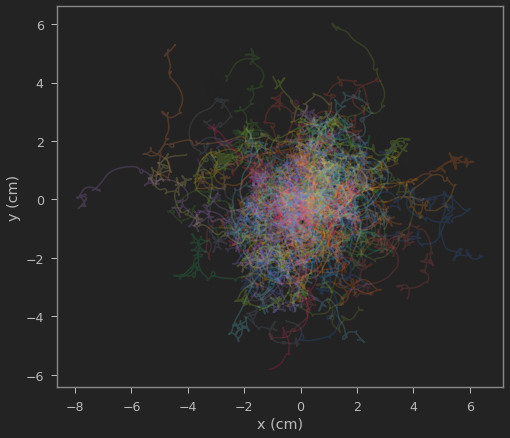

In [475]:
print(os.path.basename(save_folder))
print(f'{len_values.size} longest trajectories')
pid_lst=list(set(traj.particle.values))
for pid in pid_lst:
    d=traj[traj.particle==pid]
    x_values=d.x.values*DS
    y_values=d.y.values*DS
    plt.plot(x_values,y_values,alpha=0.2)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

In [476]:
DS=0.025
t_values=emsd.index.values*DT/10**3
emsd_values=emsd.values*DS**2

In [477]:
imsd=trackpy.imsd(traj,mpp=1,fps=1,max_lagtime=min_time)

In [478]:
##test whether Dbar from emsd equals the mean of D_exp from each imsd
num_times=imsd.index.values.shape[0]
msd_lst=[];std_lst=[]
for i in range(num_times):
    yv=imsd.iloc[i].values
    msd_lst.append(np.mean(yv))
    std_lst.append(np.std(yv))
t_values = t_values
msd_values = np.array(msd_lst)*DS**2
std_values = np.array(std_lst)*DS**2
lag_values=imsd.index.values*DT/10**3

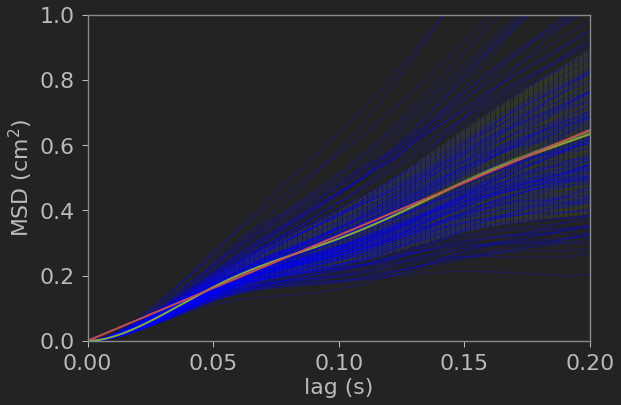

In [481]:
df=imsd
saving = False
#plot MSD
x_values=df.index.values*DT/10**3#seconds
# xlim = [0,0.05];ylim=[0,.4];
xlim = [0,.2];ylim=[0,1.];
pid_values=df.columns.values
D = Dbar;fontsize =22;figsize=(9,6)

fig, ax = plt.subplots(figsize=figsize)
plt.errorbar(lag_values,msd_values,std_values,alpha=0.2,color='g')
ax.plot(lag_values,msd_values,c='g',lw=2,alpha=0.5)

pid_values=df.columns
for pid in pid_values:
    y_values = df[pid].values*DS**2
    ax.plot(x_values,y_values,c='blue',alpha=0.2)
ax.plot(t_values,emsd_values,c='g',lw=2)
ax.plot(t_values,t_values*D,c='r',lw=2)

# DS = 5/200 #cm per pixel
# DT = 1. #ms per frame
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('lag (s)', fontsize=fontsize)
ax.set_ylabel(r'MSD (cm$^2$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
# ax.grid('none')
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
    plt.close()

In [480]:
savecsv_fn=savefig_fn.replace('.png','.csv')
pd.DataFrame({
    'lagt':t_values,
    'msd':emsd_values
}).to_csv(savecsv_fn)
os.path.abspath(savecsv_fn)

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/msd/fig/emsd_longest_unwrapped_trajectories_long_time_std.csv'

## Showing Dbar from emsd roughly equals the mean of D_expval from each imsd
- MSD of average is approximately the average of the MSD
- the slopes are not exactly the same, differing in one case by as much as 0.5 cm^2/s for the diffCoef=0.001 cm^2/s case

In [275]:
# #import unwrapped trajectories
# traj  =pd.read_csv(file)
# DT    =compute_time_between_frames(df=traj);print(f"DT={DT}")

# min_time=1700#ms
# #remove any tips that are too brief
# len_values=traj.groupby('particle').x.count().values
# id_values=traj.groupby('particle').x.count().index.values
# time_considered_values=DT*len_values-300#ms
# percent_particles_dropped=100*sum(time_considered_values<min_time)/time_considered_values.size #~39%
# pid_to_drop=id_values[time_considered_values<min_time]
# # percent_dropped
# boo_drop=False
# for pid in pid_to_drop:
#     boo_drop|=traj.particle==pid
# # percent_rows_dropped=100*sum(boo_drop.values)/boo_drop.values.size # ~11%

# #remove any particles that are too brief
# traj.drop(index=traj.index[boo_drop],inplace=True)

# len_values=traj.groupby('particle').x.count().values
# print(f"briefest remaining trajectory is {np.min(len_values*DT):.3f} ms.")
# print(f"N={len_values.size}")

DT=0.4
briefest remaining trajectory is 2013.600 ms.
N=50


In [385]:
pid_lst=list(set(traj.particle.values))
D_lst=[]
for pid in pid_lst:
    d=traj[traj.particle==pid].copy()
    emsd  =compute_emsd(d,DT,omit_time=150,printing=False)
    if emsd is not None:    
        retval= compute_Dbar(emsd,DT,MSD_thresh=1.,max_lagtime=min_time)

        D_expval,D_stderr,tau_min,tau_max,Rsquared,delta_tau=retval
        D_lst.append(D_expval)

In [386]:
D_values=np.array(D_lst)*10**3
D_expval_mean=np.mean(D_values)
print(f"mean of D from individuals was {D_expval_mean:.3f} cm^2/s")

mean of D from individuals was 3.883 cm^2/s


In [387]:
#measure Dbar
emsd  = compute_emsd(traj,DT,omit_time=150,printing=False)
retval= compute_Dbar(emsd,DT,MSD_thresh=1.,max_lagtime=min_time)
D_expval,D_stderr,tau_min,tau_max,Rsquared,delta_tau=retval
print(f'printing results for {os.path.basename(file)}')
print(retval)
# beep(5)

Dbar=D_expval*10**3
Delta_Dbar=D_stderr*10**3
min_t=min_time/10**3
print(f"Results: Dbar={Dbar:.3f}+-{Delta_Dbar:.3f} cm^2/s.  Input: min_time={min_t:.3f} seconds. N={len_values.size}. {percent_particles_dropped:.0f}% of trials were dropped")

printing results for longest_unwrapped_trajectories.csv
(0.003861562242675795, 1.0502205634641561e-05, 173.20000000000007, 1713.9999999999998, 0.9723044032332777, 1540.7999999999997)
Results: Dbar=3.862+-0.011 cm^2/s.  Input: min_time=2.000 seconds. N=25. 92% of trials were dropped


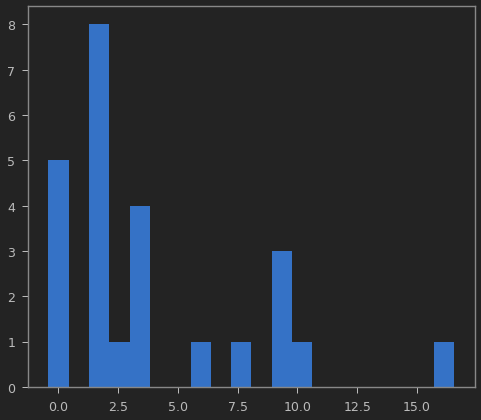

In [388]:
plt.hist(D_values,bins=20)
plt.show()

# Line up the two EMSD curves for diffCoef=0.0005 and 0.001 cm^2/s

In [197]:
#D=0.0005 case
file1='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/msd/fig/emsd_longest_unwrapped_trajectories_long_time_std.csv'
#D=0.001 case
file2='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffcoef_0.001/msd/fig/emsd_longest_unwrapped_trajectories_long_time_std.csv'
df1=pd.read_csv(file1)
df2=pd.read_csv(file2)

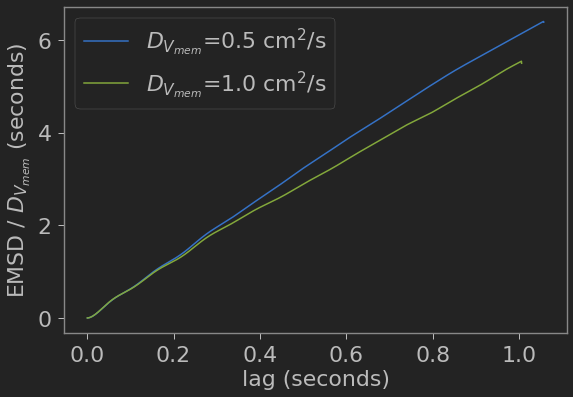

In [198]:
saving=False
savefig_folder=nb_dir+'/Figures/msd'
savefig_fn='EMSD_over_diffCoef.png'

fontsize =22;figsize=(9,6)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(df1.lagt.values,df1.msd.values/0.5,label=r'$D_{V_{mem}}$=0.5 cm$^2$/s')
ax.plot(df2.lagt.values,df2.msd.values/1,label=r'$D_{V_{mem}}$=1.0 cm$^2$/s')

# ax.set_xlim([0,.4])
# ax.set_ylim([0,3])
# ax.set_xlim([0,.02])
# ax.set_ylim([0,.2])
ax.set_xlabel('lag (seconds)', fontsize=fontsize)
ax.set_ylabel(r'EMSD / $D_{V_{mem}}$ (seconds)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.legend(fontsize=fontsize,loc='upper left')
# ax.grid('none')
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
    plt.close()

In [200]:
# ax.plot(df1.lagt.values,df1.msd.values/0.5,label=r'$D_{V_{mem}}$=0.5 cm$^2$/s')
# ax.plot(df2.lagt.values,label=r'$D_{V_{mem}}$=1.0 cm$^2$/s')

In [201]:
# df2.msd.values/1-df1.msd.values/0.5

In [202]:
from scipy import interpolate

In [203]:
#TODO: take the difference of these two curves
#xaxis=log of time
#yaxis=difference of interpolated values
x_values=np.logspace(-1,0,num=50)
fit1=interpolate.CubicSpline(df1.lagt.values,df1.msd.values/0.5)
fit2=interpolate.CubicSpline(df2.lagt.values,df2.msd.values/1.0)

In [205]:
y_lst=[]
for x in x_values:
    y=np.abs(fit2(x)-fit1(x))
    y_lst.append(y)
y_values=np.array(y_lst)


In [206]:
saving=True
savefig_folder=nb_dir+'/Figures/msd'
savefig_fn='EMSD_over_diffCoef_difference.png'
print(f"the departure from proportionality appears to have a power law dependence on lag time.")
fontsize =22;figsize=(9,6)
fig, ax = plt.subplots(figsize=figsize)

ax.plot(x_values,y_values)
ax.set_xlabel('lag (seconds)', fontsize=fontsize)
ax.set_ylabel(r'$\Delta$ EMSD / $D_{V_{mem}}$ (seconds)', fontsize=fontsize)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
    plt.close()

the departure from proportionality appears to have a power law dependence on lag time.
saved figure in 
	EMSD_over_diffCoef_difference.png


# TODO(later): determine if D is drawn from different distributions when different diffCoef is used.  (mean D appears proportional to diffCoef of voltage)

# wrapping Dbar calculation method into a function

In [117]:
#file is a longest_trajectories .csv file that has independent trajectories for each particle
file=search_for_file()

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_4/longest_unwrapped_trajectories.csv


In [123]:
#import unwrapped trajectories
traj  =pd.read_csv(file)
DT    =compute_time_between_frames(df=traj);#print(f"DT={DT}")
MSD_thresh=0.2
min_time_lst=[500,700,900]#,1100,1300]#,1500]
Dbar_lst=[]
for min_time in min_time_lst:
    #remove any tips that are too brief
    len_values=traj.groupby('particle').x.count().values
    id_values=traj.groupby('particle').x.count().index.values
    time_considered_values=DT*len_values-300#ms
    percent_particles_dropped=100*sum(time_considered_values<min_time)/time_considered_values.size #~39%
    pid_to_drop=id_values[time_considered_values<min_time]
    # percent_dropped
    boo_drop=False
    for pid in pid_to_drop:
        boo_drop|=traj.particle==pid
    # percent_rows_dropped=100*sum(boo_drop.values)/boo_drop.values.size # ~11%

    #remove any particles that are too brief
    traj.drop(index=traj.index[boo_drop],inplace=True)

    len_values=traj.groupby('particle').x.count().values
    # print(f"briefest remaining trajectory is {np.min(len_values*DT):.3f} ms.")
    print(f"N={len_values.size}")

    emsd  =compute_emsd(traj,DT,omit_time=150,printing=False)
    retval= compute_Dbar(emsd,DT,MSD_thresh=MSD_thresh,max_lagtime=500)
    D_expval,D_stderr,tau_min,tau_max,Rsquared,delta_tau=retval
    # print(f'printing results for {os.path.basename(file)}')
#     print(retval)
    # beep(5)

    Dbar=D_expval*10**3
    Delta_Dbar=D_stderr*10**3
    min_t=min_time/10**3
    # print(f"Results: Dbar={Dbar:.3f}+-{Delta_Dbar:.3f} cm^2/s.  Input: min_time={min_t:.3f} seconds. N={len_values.size}. {percent_particles_dropped:.0f}% of trials were dropped")
    # print(f"Results: Dbar={Dbar:.4f}+-{Delta_Dbar:.4f} cm^2/s.  Input: min_time={min_t:.3f} seconds. N={len_values.size}. MSD_thresh={MSD_thresh}")
    Dbar_lst.append(Dbar)
    
#averageing from 0.5 to 1.5 seconds of minimum lifetime
vals=Dbar_lst
print(f"D={np.mean(vals):.3f}+-{np.std(vals):.3f}")

N=139


TypeError: cannot unpack non-iterable NoneType object

In [119]:
beep(3)
print( os.path.basename(os.path.dirname(file)))

ds_5_param_set_4


In [120]:
vals

[-0.040008533839157694, -0.10330276661849136, -0.10418614786036035]

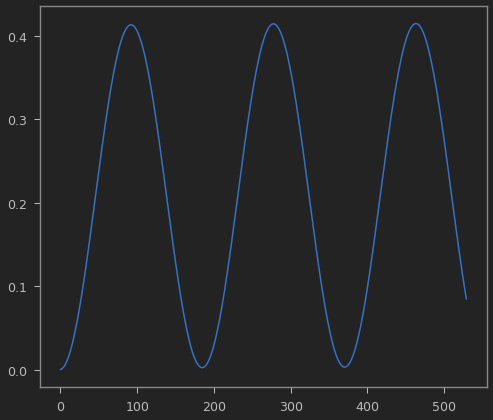

In [127]:
DS=0.025
plt.plot(emsd.values*DS**2)


# Get all trajectories that move and are longer than T_min

In [9]:
#file is a longest_trajectories .csv file that has independent trajectories for each particle
file=search_for_file()
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/trajectories_unwrap/ic_200x200.001.22_traj_sr_400_mem_0_unwrap.csv'

In [148]:
from scipy import stats

In [198]:
T_min=1500
tau_min=0#ms
tau_max=10#ms

# T_min=1500
# tau_min=400#ms
# tau_max=500#ms

df=pd.read_csv(file)
# mem=0;sr=width*2;DS=dsdpixel
# df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
DT=compute_time_between_frames(df);#print(f"DT={DT}")
df=get_all_longer_than(df,DT,T_min=T_min)

#count remaining individuals
num_individuals=len(list(set(df.particle.values)))
emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=150, printing=False,DS=0.025)
# MSD_thresh=.2
# retval= compute_Dbar(emsd,MSD_thresh=MSD_thresh,max_lagtime=100)
# D_expval,D_stderr,tau_min,tau_max,Rsquared,delta_tau=retval

#measure the slope of the log-log plot
tv=emsd.index.values
boo=(tv>=tau_min)&(tv<=tau_max)
x_values=np.log10(tv[boo])
y_values=np.log10(emsd.values[boo])
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
print(f"slope={slope:.4f} +-{std_err:.4f}, intercept={intercept:.4f}, T_min={T_min:.0f}, tau_min={tau_min:.0f}, tau_max={tau_max:.0f}, N={num_individuals}")

slope=1.9152 +-0.0082, intercept=-3.7969, T_min=1500, tau_min=0, tau_max=10, N=29


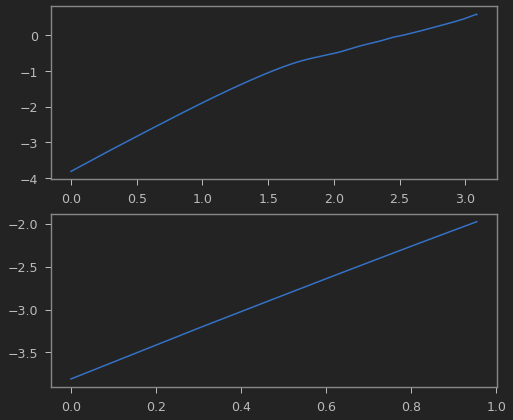

In [199]:
fig,axs=plt.subplots(2)
#measure the slope of the log-log plot
x_values=np.log10(emsd.index.values)
y_values=np.log10(emsd.values)
axs[0].plot(x_values,y_values)

tv=emsd.index.values
boo=(tv>=tau_min)&(tv<=tau_max)
x_values=np.log10(tv[boo])
y_values=np.log10(emsd.values[boo])
axs[1].plot(x_values,y_values)
plt.show()


In [233]:
# #compute emsd
# T_min=1500

# df=pd.read_csv(file)
# # mem=0;sr=width*2;DS=dsdpixel
# # df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
# DT=compute_time_between_frames(df);#print(f"DT={DT}")
# df=get_all_longer_than(df,DT,T_min=T_min)

# #count remaining individuals
# num_individuals=len(list(set(df.particle.values)))
# emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=150, printing=False,DS=0.025)

In [242]:
folder=os.path.dirname(file)
os.chdir(folder)
#get all files matching this pattern
input_fn_lst=get_all_files_matching_pattern(file,trgt='_unwrap.csv')

# TODO: compute parameters for the trial-averaged MSD model
- TODO: compute the 95% CI for v_rms, tau_0, and D for beta=1
- TODO: plot distributions of v_rms, tau_0, and D for beta=1

In [464]:
# lag_values
# intercept_lst_lst
ivals=np.mean(np.array(intercept_lst_lst),axis=0)
svals=np.mean(np.array(slope_lst_lst),axis=0)
svals.shape

(70,)

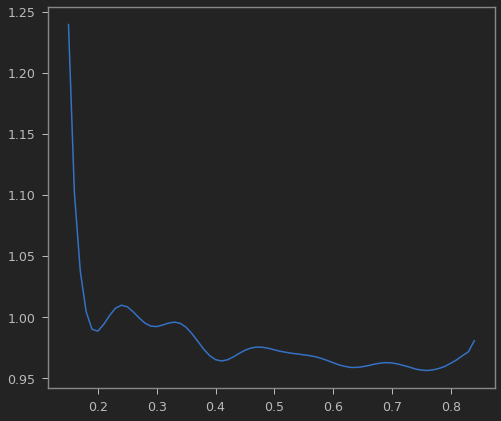

In [468]:
plt.plot(lag_values,svals)

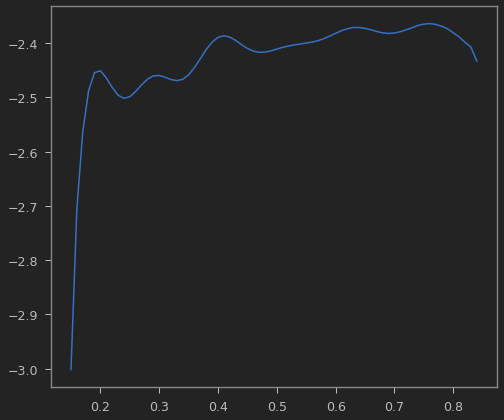

In [469]:
plt.plot(lag_values,ivals)

In [513]:
n=6
slope, intercept, r_value, p_value, std_err = stats.linregress(lag_values[:n],ivals[:n])
bsmall=intercept

# bsmall=ivals[0]-1.3
boo=(lag_values>=0.2)&(lag_values<=0.3)
blarge=np.mean(ivals[boo])


#estimate root mean squared velocity of spiral tips in units of cm/ms=10m/s
v_rms=10**(bsmall/2)
print(f"v_rms={v_rms*10:.3f} m/s")

tau_0=10**(blarge-bsmall)#ms
print(f"tau_0={tau_0:.3f} ms")
D=v_rms**2*tau_0*10**3/4

print(f"D={D:.3f} cm^2/s")

v_rms=0.063 m/s
tau_0=83.949 ms
D=0.834 cm^2/s


__Parameter Results__
- v_rms=0.063 m/s (note: not robust to choice of n)
- tau_0=84. ms (note: not robust to choice of n)
- D=0.834 cm^2/s (note: this appears robust to choice of n)

In [514]:
#compute emsd
df=pd.read_csv(fn)
# mem=0;sr=width*2;DS=dsdpixel
# df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
DT=compute_time_between_frames(df);#print(f"DT={DT}")
df=get_all_longer_than(df,DT,T_min=T_min)
#count remaining individuals
num_individuals=len(list(set(df.particle.values)))
emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=150, printing=False,DS=0.025)

In [563]:
list({'a':1}.keys())

['a']

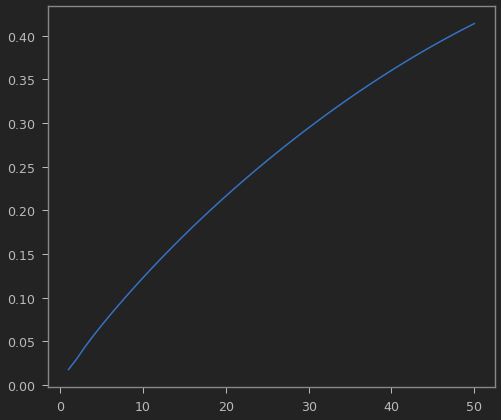

In [612]:
#TODO: improve measurement of v_rms using linear regression of RMSD versus lag
NV=50
rmsd_values=np.sqrt(emsd.values)[:NV]
lag_values=emsd.index.values[:NV]

plt.plot(lag_values,rmsd_values)
plt.show()

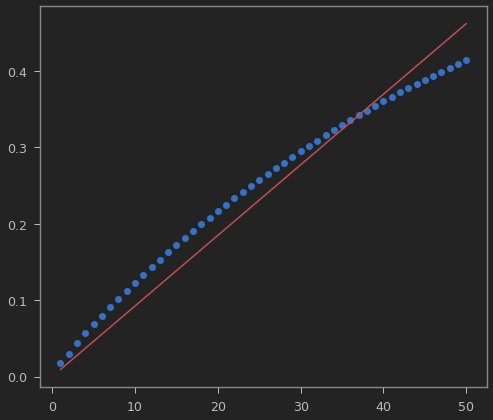

In [613]:
import numpy as np
import matplotlib.pyplot as plt

x = lag_values
y = rmsd_values

# Our model is y = a * x, so things are quite simple, in this case...
# x needs to be a column vector instead of a 1D vector for this, however.
x = x[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(x, y,rcond=None)

plt.plot(x, y, 'bo')
plt.plot(x, a*x, 'r-')
plt.show()

In [611]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x.T, y)
slope, intercept, r_value, p_value, std_err

(0.0016628155848677406, 0.3925834531658624, 0.9794007233731558, nan, nan)

In [588]:
from scipy.optimize import leastsq,least_squares

# dev viewer - plot emsd & its slope on given axes &> viewer

In [50]:
#TODO: import aggregated LR results and compute emsd
# file=search_for_file()
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4/all_traj_longer_than_500.csv'

In [88]:
T_min=500
omit_time=25
df=pd.read_csv(file)
df.head()

,t,x,y,frame,particle
0,122.1,0.00000,0.00000,11,297
1,124.1,-7.65039,-4.51818,12,297
2,126.1,-11.46609,-6.32410,13,297
3,128.1,-14.00271,-7.07949,14,297
4,130.1,-15.36420,-7.11947,15,297


In [89]:
# df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
DT=compute_time_between_frames(df);print(f"DT={DT}")
# df=get_all_longer_than(df,DT,T_min=T_min)
#count remaining individuals
num_individuals=len(list(set(df.particle.values)));print(f"num_individuals={num_individuals}")
emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=omit_time, printing=False,DS=0.025)
emsd

DT=2.0
num_individuals=9


lagt
2.0      0.006101
4.0      0.020855
6.0      0.042802
8.0      0.070831
10.0     0.104020
           ...   
454.0    9.493934
456.0    9.459469
458.0    9.428571
460.0    9.401575
462.0    9.611253
Name: msd, Length: 231, dtype: float64

In [90]:
# def _plot_emsd(ax,emsd,label='_Hidden', color='gray', alpha=0.3,**kwargs):
#     x_values=emsd.index.values/10**3#np.log10(emsd.index.values)# lag in seconds
#     y_values=emsd.values#*10**3#np.log10(emsd.values) #msd in cm^2
#     ax.plot(x_values,y_values, label=label, color=color, alpha=alpha,**kwargs)

# def _format_plot_emsd(ax,fontsize=20,use_loglog=True):
#     #format plot
#     if use_loglog:
#         ax.set_xscale('log')
#         ax.set_yscale('log')
#     ax.set_xlabel('lag (seconds)',fontsize=fontsize)
#     ax.set_ylabel('MSD (cm$^2$)',fontsize=fontsize)
# #     ax.set_title(f'FK model, Area:25cm$^2$, $D_{{V_{{mem}}}}$:0.5cm$^2$/s, N:{trials_considered}\nmin_duration:{T_min/10**3:.1f}s\n',fontsize=fontsize)
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.tick_params(axis='both', which='minor', labelsize=0)
# #     ax.set_ylim([0,2.05])

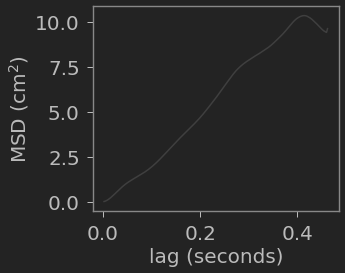

In [91]:
figsize=(5,4);
saving=False
# savefig_folder=os.path.join(nb_dir,'Figures/msd_loglog')
# savefig_fn=f'logMSD_vs_loglag_Tmin_{T_min/10**3:.1f}_N_{trials_considered}_mni_{min_num_individuals}.png'

fig,ax=plt.subplots(figsize=figsize)
_plot_emsd(ax,emsd)
_format_plot_emsd(ax,use_loglog=False)

if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
    plt.close()

In [92]:
#measure the slope of the log-log plot
x_values=emsd.index.values/10**3#np.log10(emsd.index.values)
y_values=emsd.values#*10**3#np.log10(emsd.values)

In [94]:
# def compute_slope_vs_lag(emsd,T_min,omit_time,window_width=300,stepsize=10):
#     tau_min_values=np.arange(0,T_min-2*omit_time,stepsize)#ms
#     #compute the slope over a sliding window
#     slope_lst=[]
#     for tau_min in tau_min_values:
#         tau_max=tau_min+window_width
#         #measure the slope of the log-log plot
#         tv=emsd.index.values
#         boo=(tv>=tau_min)&(tv<=tau_max)
#         x_values=np.log10(tv[boo])
#         y_values=np.log10(emsd.values[boo])
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
#         #     print(f"slope={slope:.4f} +-{std_err:.4f}, intercept={intercept:.4f}, T_min={T_min:.0f}, tau_min={tau_min:.0f}, tau_max={tau_max:.0f}, N={num_individuals}")
#         slope_lst.append(slope)
#     slope_values=np.array(slope_lst)
#     lag_values=(tau_min_values+window_width/2)/10**3
#     return lag_values,slope_values

# def _plot_slope_of_emsd(ax,emsd,label='_Hidden', color='gray', alpha=0.3,plot_reference_lines=True,**kwargs):
#     lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=50,stepsize=10)
#     ax.plot(lag_values,slope_values, label=label, color=color, alpha=alpha,**kwargs)
#     if plot_reference_lines:
#         ax.plot(lag_values,2+0.*slope_values,label='ballistic')
#         ax.plot(lag_values,1+0.*slope_values,label='diffusive')
# def _format_slope_of_emsd(ax,fontsize=20,use_loglog=True):
#     #format plot
#     if use_loglog:
#         ax.set_xscale('log')
#         ax.set_yscale('log')
#     ax.set_xlabel('lag (seconds)',fontsize=fontsize)
#     ax.set_ylabel('exponent value',fontsize=fontsize)
# #     ax.set_title(f'FK model, Area:25cm$^2$, $D_{{V_{{mem}}}}$:0.5cm$^2$/s, N:{trials_considered}\nmin_duration:{T_min/10**3:.1f}s\n',fontsize=fontsize)
#     ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     ax.tick_params(axis='both', which='minor', labelsize=0)
#     ax.legend(loc='best',fontsize=fontsize)
# #     ax.set_ylim([0,2.05])


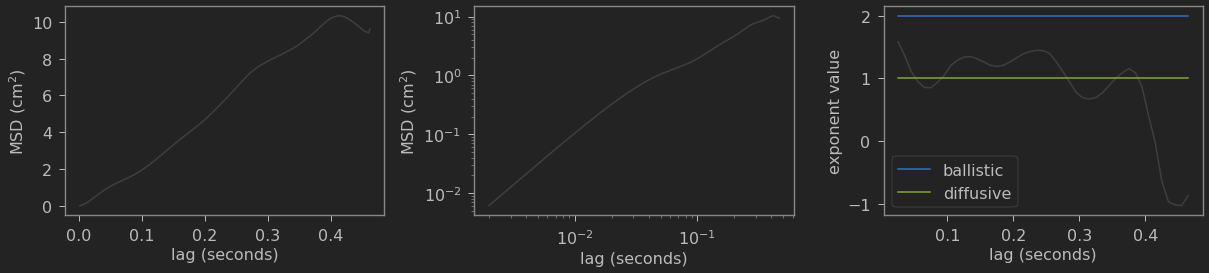

In [106]:
figsize=(17,4);fontsize=16
saving=False
# savefig_folder=os.path.join(nb_dir,'Figures/msd_loglog')
# savefig_fn=f'logMSD_vs_loglag_Tmin_{T_min/10**3:.1f}_N_{trials_considered}_mni_{min_num_individuals}.png'

fig,axs=plt.subplots(ncols=3,figsize=figsize)
_plot_emsd(axs[0],emsd)
_format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

_plot_emsd(axs[1],emsd)
_format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

_plot_slope_of_emsd(axs[2],emsd,label='_Hidden', color='gray', alpha=0.3,plot_reference_lines=True)
_format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False)

if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
    plt.close()

# TODO: define a module for computing the 95% CI of given x, y data

__Formulae for 95% confidence intervals resulting from least squares__
- sum of squares
$$
SS_{xx} = \sum_{i=1}^n(x_i-\bar x)^2\quad SS_{xy} = \sum_{i=1}^n(x_i-\bar x)((y_i-\bar y)
$$

- expected slope
$$
\hat m = SS_{xy}/SS_{xx}
$$

- expected intercept
$$
\hat b = \bar y - \hat m \bar x
$$

- standard error of fit
$$
s_{y,x}^2 = \frac{1}{n-2}\sum_{i=1}^n(y_i-\hat y_i)^2
$$

- standard deviation of slope
$$
s_m^2 = s^2_{y,x}/SS_{xx}
$$

- 95% confidence interval of intercept
$$
\hat m \pm 2s_m\qquad\text{for}\; n\ge 8
$$

- standard deviation of intercept
$$
s_b^2=s^2_{y,x}\Big(n^{-1}+\frac{\bar{x}^2}{SS_{xx}}\Big)
$$

- 95% confidence interval of intercept
$$
\hat b \pm 2s_b\qquad\text{for}\; n\ge 8
$$

In [154]:
def compute_95CI_ols(x,y):
    '''returns the max likliehood estimators and 95% confidence intervals 
    that result from ordinary least squares regression applied to the 
    1-dimensional numpy arrays, x and y.'''
    n=x.shape[0]
    assert(n==y.shape[0])
    assert(n>2)
    if not n>=8:
        print('Warning: CI not valid for less than 8 data points!')
    xbar=np.mean(x);ybar=np.mean(y)
    #compute sums of squares
    SSxx=np.sum((x-xbar)**2)
    SSxy=np.dot((x-xbar),(y-ybar))
    SSyy=np.sum((y-ybar)**2)
    #best linear unbiased estimator of slope
    m=SSxy/SSxx
    #best linear unbiased estimator of intercept
    b=ybar-m*xbar
    #values of fit
    yhat=b+m*x
    #standard error of fit, s_{y,x}^2=ssE
    SSE=np.sum((y-yhat)**2)
    ssE=SSE/(n-2)
    #standard deviation of slope
    sm = np.sqrt(ssE/SSxx)
    #standard deviation of intercept
    sb = np.sqrt(ssE*(1/n+xbar**2/SSxx))
    #compute 95% CI for parameters
    Delta_m = 2*sm
    Delta_b = 2*sb
    #compute Rsquared
    Rsquared=(SSyy-SSE)/SSyy
    #format results as a human readable dict
    dict_output={
        'm':m,
        'Delta_m':Delta_m,
        'b':b,
        'Delta_b':Delta_b,
        'Rsquared':Rsquared
    }
    return dict_output

(0.028425315970363914, 0.031602520831964354, 0.9987980960488757, 4.33668352121793e-09, 0.0005694706094149862)


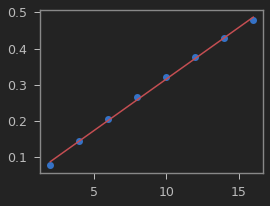

In [155]:
#TODO: improve measurement of v_rms using linear regression of RMSD versus lag
#reference/check
NV=8
rmsd_values=np.sqrt(emsd.values)[:NV]
lag_values=emsd.index.values[:NV]

# Our model is y = a * x, so things are quite simple, in this case...
# x needs to be a column vector instead of a 1D vector for this, however.
x = lag_values
y = rmsd_values
x,y

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print((slope, intercept, r_value, p_value, std_err))
plt.subplots(figsize=(4,3))
plt.plot(x, y, 'bo')
plt.plot(x, slope*x+intercept, 'r-')
plt.show()

{'m': 0.028425315970363914, 'Delta_m': 0.0011389412188299443, 'b': 0.031602520831964354, 'Delta_b': 0.011502742464077148, 'Rsquared': 0.9975976366708593}
2.8189256484623115e-17


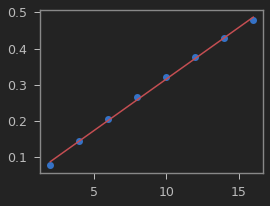

In [157]:
#DONE: sanity checks that ^this module gives reasonable values
dict_output=compute_95CI_ols(x,y)
print(dict_output)
std_err=0.0005694706094149862
print(std_err*2-0.0011389412188299443)
plt.subplots(figsize=(4,3))
plt.plot(x, y, 'bo')
plt.plot(x, m*x+b, 'r-')
plt.show()

# dev measures of MSD model parameters
$v_\text{rms}$ and $\tau_0$

__Results__ 
- v_rms resulting from slope of RMSD is the best estimator
    - comparing v_rms resulting from slope of RMSD to v_rms resulting from intercept of log-log plot of MSD, it is obvious to use the slope of RMSD


In [174]:
# v_rms resulting from slope of RMSD
NV=8
lag_values=emsd.index.values[:NV]/10**3
rmsd_values=np.sqrt(emsd.values)[:NV]
dict_output=compute_95CI_ols(x=lag_values,y=rmsd_values)
print(f"By slope of RMSD, v_rms = {dict_output['m']} +- {dict_output['Delta_m']} cm/s")

By slope of RMSD, v_rms = 28.425315970363915 +- 1.138941218829944 cm/s


In [176]:
# v_rms resulting from slope of RMSD
NV=8
x=np.log10(emsd.index.values[:NV]/10**3)
y=np.log10(emsd.values[:NV])
dict_output=compute_95CI_ols(x=x,y=y)
print(f"By intercept of loglog plot, v_rms = {np.sqrt(10**dict_output['b'])} +- {np.sqrt(10**dict_output['Delta_b'])} cm/s")
print (f"Don't use ^this!")

By intercept of loglog plot, v_rms = 17.767968361651945 +- 1.044870662061646 cm/s
Don't use ^this!


By slope of MSD, D = 4.4604822899718535 +- 0.08870584272299915 cm^2/s


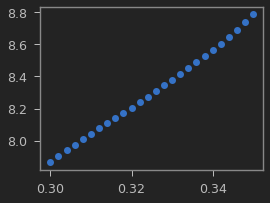

In [190]:
#TODO: compute D resulting from slope of MSD to D resulting from intercept of log-log plot of MSD
tau_min=300#ms
window_width=50#ms
tau_max=tau_min+window_width
msd_values=emsd.values
lag_values=emsd.index.values
boo=(lag_values>=tau_min)&(lag_values<=tau_max)
x = lag_values[boo]/10**3
y = msd_values[boo]
# D resulting from slope of MSD
dict_output=compute_95CI_ols(x=x,y=y)
print(f"By slope of MSD, D = {dict_output['m']/4} +- {dict_output['Delta_m']/4} cm^2/s")


plt.subplots(figsize=(4,3))
plt.plot(x, y, 'bo')
# plt.plot(x, slope*x+intercept, 'r-')
plt.show()

By slope of MSD, D = 7.106328992590979 +- 0.284735304707486 cm^2/s
